# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import the libraries you will be using for analysis

In [3]:
import numpy as np

In [1]:
import pandas as pd

C:\Users\dhana\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [73]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

In [7]:
print("numpy version:", np.__version__)

numpy version: 1.26.4


In [5]:
print("pandas version:", pd.__version__)

pandas version: 2.2.2


In [9]:
print("matplotlib version:", plt.matplotlib.__version__)

matplotlib version: 3.10.0


In [10]:
print("seaborn version:", sns.__version__)

seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()

In [2]:
df1=pd.read_parquet('C:/Users/dhana/Desktop/Niranjan Python/EDA/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/2023-1.parquet')
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

There are a total 3041714 rows in 2023-1.parquet file. Assuming this to be general trend of 12 such files, there could be 3.65 crore entries in all files combined. This will also result into a high memory usage for reading all this data , so sampling of data becomes essential.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/Assignments/EDA/data_NYC_Taxi/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file



        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date

            # Iterate through each hour of the selected date

                # Sample 5% of the hourly data randomly

                # add data of this hour to the dataframe

        # Concatenate the sampled data of all the dates to a single dataframe
        df = # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Data for January

In [3]:
df1['tpep_pickup_datetime'] = pd.to_datetime(df1['tpep_pickup_datetime'])
df1['year'] = df1['tpep_pickup_datetime'].dt.year
df1['month'] = df1['tpep_pickup_datetime'].dt.month
df1['day'] = df1['tpep_pickup_datetime'].dt.day
df1['hour'] = df1['tpep_pickup_datetime'].dt.hour
df1['minute'] = df1['tpep_pickup_datetime'].dt.minute
df1['second'] = df1['tpep_pickup_datetime'].dt.second
df1
hour_data1=df1[['month','day','hour','minute']]
hour_data1
sample1 = hour_data1.sample(frac = 0.05, random_state = 42)
sample1
jan=df1.loc[sample1.index].reset_index()
jan

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0        323412         1  2023-01-05 07:50:08   2023-01-05 08:02:04   
1       1491266         2  2023-01-17 07:47:24   2023-01-17 08:00:50   
2       2385670         2  2023-01-25 21:57:59   2023-01-25 22:00:33   
3        766545         2  2023-01-09 19:36:54   2023-01-09 19:52:01   
4        980153         1  2023-01-11 22:19:13   2023-01-11 22:32:37   
...         ...       ...                  ...                   ...   
152081  2458862         2  2023-01-26 16:36:18   2023-01-26 16:42:36   
152082  1685425         1  2023-01-18 23:17:20   2023-01-18 23:22:57   
152083   726902         2  2023-01-09 12:50:57   2023-01-09 13:13:26   
152084   958184         2  2023-01-11 19:42:23   2023-01-11 20:09:57   
152085  2043725         2  2023-01-22 11:05:26   2023-01-22 11:11:55   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                   2.0           1.90         1.0                  N   
1                   5.0           1.86         1.0                  N   
2                   1.0           0.50         1.0                  N   
3                   2.0           2.56         1.0                  N   
4                   1.0           2.80         1.0                  N   
...                 ...            ...         ...                ...   
152081              1.0           0.96         1.0                  N   
152082              1.0           1.30         1.0                  N   
152083              2.0           8.69         1.0                  N   
152084              2.0          17.40         2.0                  N   
152085              2.0           0.71         1.0                  N   

        PULocationID  DOLocationID  ...  improvement_surcharge  total_amount  \
0                239           236  ...                    1.0         20.00   
1                239           162  ...                    1.0         21.84   
2                162           170  ...                    1.0         12.12   
3                162           262  ...                    1.0         28.20   
4                164           231  ...                    1.0         23.88   
...              ...           ...  ...                    ...           ...   
152081           226           260  ...                    1.0         11.90   
152082           239           238  ...                    1.0         16.30   
152083           138           247  ...                    1.0         61.67   
152084           132           170  ...                    1.0         90.55   
152085            13           209  ...                    1.0         14.28   

        congestion_surcharge  airport_fee  year  month  day  hour  minute  \
0                        2.5         0.00  2023      1    5     7      50   
1                        2.5         0.00  2023      1   17     7      47   
2                        2.5         0.00  2023      1   25    21      57   
3                        2.5         0.00  2023      1    9    19      36   
4                        2.5         0.00  2023      1   11    22      19   
...                      ...          ...   ...    ...  ...   ...     ...   
152081                   0.0         0.00  2023      1   26    16      36   
152082                   2.5         0.00  2023      1   18    23      17   
152083                   0.0         1.25  2023      1    9    12      50   
152084                   2.5         0.00  2023      1   11    19      42   
152085                   2.5         0.00  2023      1   22    11       5   

        second  
0            8  
1           24  
2           59  
3           54  
4           13  
...        ...  
152081      18  
152082      20  
152083      57  
152084      23  
152085      26  

[152086 rows x 26 columns]

In [ ]:
#Data for February

In [13]:
df2=pd.read_parquet('C:/Users/dhana/Desktop/Niranjan Python/EDA/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/2023-2.parquet')
df2['tpep_pickup_datetime'] = pd.to_datetime(df2['tpep_pickup_datetime'])
df2['year'] = df2['tpep_pickup_datetime'].dt.year
df2['month'] = df2['tpep_pickup_datetime'].dt.month
df2['day'] = df2['tpep_pickup_datetime'].dt.day
df2['hour'] = df2['tpep_pickup_datetime'].dt.hour
df2['minute'] = df2['tpep_pickup_datetime'].dt.minute
df2['second'] = df2['tpep_pickup_datetime'].dt.second
df2
hour_data2=df2[['month','day','hour','minute']]
hour_data2
sample2 = hour_data2.sample(frac = 0.05, random_state = 42)
sample2
feb=df2.loc[sample2.index].reset_index()
feb

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0        916579         2  2023-03-09 14:46:50   2023-03-09 14:58:16   
1       2215179         2  2023-03-21 17:42:34   2023-03-21 17:51:25   
2        487093         2  2023-03-05 12:48:17   2023-03-05 12:50:57   
3        771166         1  2023-03-08 10:33:38   2023-03-08 10:57:39   
4       1209116         2  2023-03-11 23:57:51   2023-03-12 00:12:13   
...         ...       ...                  ...                   ...   
168699  1411617         2  2023-03-14 08:28:06   2023-03-14 08:40:57   
168700  1208616         1  2023-03-11 23:29:51   2023-03-11 23:39:13   
168701  2929934         2  2023-03-28 15:03:19   2023-03-28 15:08:44   
168702  1141807         2  2023-03-11 13:38:18   2023-03-11 13:44:25   
168703  1878357         1  2023-03-18 09:03:39   2023-03-18 09:13:15   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                   2.0           1.20         1.0                  N   
1                   3.0           1.13         1.0                  N   
2                   1.0           0.63         1.0                  N   
3                   2.0           2.30         1.0                  N   
4                   1.0           4.17         1.0                  N   
...                 ...            ...         ...                ...   
168699              1.0           3.62         1.0                  N   
168700              1.0           0.90         1.0                  N   
168701              1.0           1.24         1.0                  N   
168702              3.0           1.16         1.0                  N   
168703              1.0           1.60         1.0                  N   

        PULocationID  DOLocationID  ...  improvement_surcharge  total_amount  \
0                161           140  ...                    1.0         15.40   
1                249           148  ...                    1.0         17.50   
2                234           186  ...                    1.0         10.92   
3                229           100  ...                    1.0         21.00   
4                148           262  ...                    1.0         26.18   
...              ...           ...  ...                    ...           ...   
168699            79            88  ...                    1.0         25.10   
168700            48           143  ...                    1.0         17.90   
168701           142           236  ...                    1.0         15.12   
168702           229           137  ...                    1.0         15.47   
168703            24           239  ...                    1.0         14.70   

        congestion_surcharge  Airport_fee  year  month  day  hour  minute  \
0                        2.5          0.0  2023      3    9    14      46   
1                        2.5          0.0  2023      3   21    17      42   
2                        2.5          0.0  2023      3    5    12      48   
3                        2.5          0.0  2023      3    8    10      33   
4                        2.5          0.0  2023      3   11    23      57   
...                      ...          ...   ...    ...  ...   ...     ...   
168699                   2.5          0.0  2023      3   14     8      28   
168700                   2.5          0.0  2023      3   11    23      29   
168701                   2.5          0.0  2023      3   28    15       3   
168702                   2.5          0.0  2023      3   11    13      38   
168703                   2.5          0.0  2023      3   18     9       3   

        second  
0           50  
1           34  
2           17  
3           38  
4           51  
...        ...  
168699       6  
168700      51  
168701      19  
168702      18  
168703      39  

[168704 rows x 26 columns]

In [ ]:
#Data for March

In [15]:
df3=pd.read_parquet('C:/Users/dhana/Desktop/Niranjan Python/EDA/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/2023-3.parquet')
df3['tpep_pickup_datetime'] = pd.to_datetime(df3['tpep_pickup_datetime'])
df3['year'] = df3['tpep_pickup_datetime'].dt.year
df3['month'] = df3['tpep_pickup_datetime'].dt.month
df3['day'] = df3['tpep_pickup_datetime'].dt.day
df3['hour'] = df3['tpep_pickup_datetime'].dt.hour
df3['minute'] = df3['tpep_pickup_datetime'].dt.minute
df3['second'] = df3['tpep_pickup_datetime'].dt.second
df3
hour_data3=df3[['month','day','hour','minute']]
hour_data3
sample3 = hour_data3.sample(frac = 0.05, random_state = 42)
sample3
mar=df3.loc[sample3.index].reset_index()
mar

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0       2097285         2  2023-06-20 12:43:51   2023-06-20 12:53:23   
1       3271413         2  2023-06-20 06:53:00   2023-06-20 07:01:00   
2        171255         2  2023-06-02 15:30:55   2023-06-02 15:48:02   
3        595910         1  2023-06-06 14:22:24   2023-06-06 14:34:47   
4       1788425         2  2023-06-17 00:10:53   2023-06-17 00:19:04   
...         ...       ...                  ...                   ...   
163785   913397         2  2023-06-09 07:24:48   2023-06-09 07:32:27   
163786  1789717         1  2023-06-17 00:03:48   2023-06-17 00:14:33   
163787   155722         2  2023-06-02 12:39:01   2023-06-02 12:43:24   
163788    94723         1  2023-06-01 20:36:44   2023-06-01 20:46:57   
163789   231548         2  2023-06-02 23:27:51   2023-06-02 23:45:58   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                   1.0           0.61         1.0                  N   
1                   NaN           1.36         NaN               None   
2                   1.0           1.40         1.0                  N   
3                   1.0           1.20         1.0                  N   
4                   4.0           1.54         1.0                  N   
...                 ...            ...         ...                ...   
163785              1.0           1.95         1.0                  N   
163786              1.0           1.60         1.0                  N   
163787              2.0           0.48         1.0                  N   
163788              1.0           2.50         1.0                  N   
163789              1.0           3.09         1.0                  N   

        PULocationID  DOLocationID  ...  improvement_surcharge  total_amount  \
0                164           161  ...                    1.0         15.96   
1                263           140  ...                    1.0         12.25   
2                186           161  ...                    1.0         23.52   
3                141           141  ...                    1.0         18.10   
4                 48            68  ...                    1.0         18.00   
...              ...           ...  ...                    ...           ...   
163785           166           238  ...                    1.0         19.25   
163786            79           209  ...                    1.0         17.00   
163787           151            24  ...                    1.0          8.00   
163788             4            87  ...                    1.0         23.95   
163789           163           262  ...                    1.0         24.80   

        congestion_surcharge  Airport_fee  year  month  day  hour  minute  \
0                        2.5          0.0  2023      6   20    12      43   
1                        NaN          NaN  2023      6   20     6      53   
2                        2.5          0.0  2023      6    2    15      30   
3                        2.5          0.0  2023      6    6    14      22   
4                        2.5          0.0  2023      6   17     0      10   
...                      ...          ...   ...    ...  ...   ...     ...   
163785                   2.5          0.0  2023      6    9     7      24   
163786                   2.5          0.0  2023      6   17     0       3   
163787                   0.0          0.0  2023      6    2    12      39   
163788                   2.5          0.0  2023      6    1    20      36   
163789                   2.5          0.0  2023      6    2    23      27   

        second  
0           51  
1            0  
2           55  
3           24  
4           53  
...        ...  
163785      48  
163786      48  
163787       1  
163788      44  
163789      51  

[163790 rows x 26 columns]

In [ ]:
#Data for April

In [17]:
df4=pd.read_parquet('C:/Users/dhana/Desktop/Niranjan Python/EDA/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/2023-4.parquet')
df4['tpep_pickup_datetime'] = pd.to_datetime(df4['tpep_pickup_datetime'])
df4['year'] = df4['tpep_pickup_datetime'].dt.year
df4['month'] = df4['tpep_pickup_datetime'].dt.month
df4['day'] = df4['tpep_pickup_datetime'].dt.day
df4['hour'] = df4['tpep_pickup_datetime'].dt.hour
df4['minute'] = df4['tpep_pickup_datetime'].dt.minute
df4['second'] = df4['tpep_pickup_datetime'].dt.second
df4
hour_data4=df4[['month','day','hour','minute']]
hour_data4
sample4 = hour_data4.sample(frac = 0.05, random_state = 42)
sample4
apr=df4.loc[sample4.index].reset_index()
apr

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0       1835730         1  2023-08-21 15:45:08   2023-08-21 16:02:36   
1       2703087         2  2023-08-31 17:38:18   2023-08-31 18:16:27   
2        703743         1  2023-08-08 19:44:21   2023-08-08 19:57:55   
3        996912         2  2023-08-11 20:32:35   2023-08-11 20:51:29   
4       1750251         1  2023-08-20 13:45:34   2023-08-20 14:36:21   
...         ...       ...                  ...                   ...   
139640  1335509         1  2023-08-15 20:35:03   2023-08-15 20:41:55   
139641    92454         1  2023-08-01 23:13:47   2023-08-01 23:23:29   
139642  2412679         2  2023-08-28 11:04:46   2023-08-28 11:11:32   
139643  2327946         2  2023-08-27 07:39:07   2023-08-27 07:54:24   
139644  1334090         2  2023-08-15 20:35:00   2023-08-15 20:42:10   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                   3.0           1.80         1.0                  N   
1                   1.0           5.53         1.0                  N   
2                   2.0           2.60         1.0                  N   
3                   1.0           3.27         1.0                  N   
4                   2.0          18.40         2.0                  N   
...                 ...            ...         ...                ...   
139640              2.0           0.90         1.0                  N   
139641              1.0           2.10         1.0                  Y   
139642              2.0           1.45         1.0                  N   
139643              1.0           3.96         1.0                  N   
139644              1.0           1.32         1.0                  N   

        PULocationID  DOLocationID  ...  improvement_surcharge  total_amount  \
0                246           170  ...                    1.0         22.10   
1                164            83  ...                    1.0         48.64   
2                 79           246  ...                    1.0         27.35   
3                263           234  ...                    1.0         28.92   
4                132           113  ...                    1.0         99.19   
...              ...           ...  ...                    ...           ...   
139640           249           211  ...                    1.0         13.20   
139641           234           231  ...                    1.0         18.50   
139642           233           161  ...                    1.0         15.96   
139643           137           239  ...                    1.0         29.40   
139644            68           158  ...                    1.0         16.30   

        congestion_surcharge  Airport_fee  year  month  day  hour  minute  \
0                        2.5         0.00  2023      8   21    15      45   
1                        2.5         0.00  2023      8   31    17      38   
2                        2.5         0.00  2023      8    8    19      44   
3                        2.5         0.00  2023      8   11    20      32   
4                        2.5         1.75  2023      8   20    13      45   
...                      ...          ...   ...    ...  ...   ...     ...   
139640                   2.5         0.00  2023      8   15    20      35   
139641                   2.5         0.00  2023      8    1    23      13   
139642                   2.5         0.00  2023      8   28    11       4   
139643                   2.5         0.00  2023      8   27     7      39   
139644                   2.5         0.00  2023      8   15    20      35   

        second  
0            8  
1           18  
2           21  
3           35  
4           34  
...        ...  
139640       3  
139641      47  
139642      46  
139643       7  
139644       0  

[139645 rows x 26 columns]

In [ ]:
#Data for May

In [18]:
df5=pd.read_parquet('C:/Users/dhana/Desktop/Niranjan Python/EDA/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/2023-5.parquet')
df5['tpep_pickup_datetime'] = pd.to_datetime(df5['tpep_pickup_datetime'])
df5['year'] = df5['tpep_pickup_datetime'].dt.year
df5['month'] = df5['tpep_pickup_datetime'].dt.month
df5['day'] = df5['tpep_pickup_datetime'].dt.day
df5['hour'] = df5['tpep_pickup_datetime'].dt.hour
df5['minute'] = df5['tpep_pickup_datetime'].dt.minute
df5['second'] = df5['tpep_pickup_datetime'].dt.second
df5
hour_data5=df5[['month','day','hour','minute']]
hour_data5
sample5 = hour_data5.sample(frac = 0.05, random_state = 42)
sample5
may=df5.loc[sample5.index].reset_index()
may

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0       1356466         2  2023-02-14 13:29:24   2023-02-14 13:39:00   
1       1597181         2  2023-02-16 17:57:52   2023-02-16 18:17:40   
2       1817249         2  2023-02-18 17:59:44   2023-02-18 18:07:10   
3       1328228         2  2023-02-14 08:32:34   2023-02-14 09:19:01   
4        792654         1  2023-02-08 22:52:56   2023-02-08 23:04:52   
...         ...       ...                  ...                   ...   
144454  2300315         2  2023-02-23 18:58:25   2023-02-23 19:08:36   
144455  1922289         2  2023-02-19 19:40:31   2023-02-19 19:52:41   
144456  1971447         2  2023-02-20 13:51:45   2023-02-20 13:56:57   
144457  1794016         2  2023-02-18 14:01:02   2023-02-18 14:16:11   
144458   204052         1  2023-02-02 21:24:42   2023-02-02 21:35:03   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                   1.0           1.14         1.0                  N   
1                   1.0           2.17         1.0                  N   
2                   3.0           1.12         1.0                  N   
3                   1.0          17.87         2.0                  N   
4                   1.0           4.10         1.0                  N   
...                 ...            ...         ...                ...   
144454              2.0           1.44         1.0                  N   
144455              2.0           1.97         1.0                  N   
144456              1.0           0.81         1.0                  N   
144457              2.0           3.50         1.0                  N   
144458              1.0           1.90         1.0                  N   

        PULocationID  DOLocationID  ...  improvement_surcharge  total_amount  \
0                230           142  ...                    1.0         15.70   
1                163            68  ...                    1.0         29.04   
2                231           249  ...                    1.0         16.62   
3                209           132  ...                    1.0         82.00   
4                261            79  ...                    1.0         29.75   
...              ...           ...  ...                    ...           ...   
144454           234           230  ...                    1.0         17.20   
144455           100           249  ...                    1.0         22.75   
144456           234           249  ...                    1.0         13.20   
144457           107           112  ...                    1.0         29.65   
144458           246           114  ...                    1.0         16.40   

        congestion_surcharge  Airport_fee  year  month  day  hour  minute  \
0                        2.5          0.0  2023      2   14    13      29   
1                        2.5          0.0  2023      2   16    17      57   
2                        2.5          0.0  2023      2   18    17      59   
3                        2.5          0.0  2023      2   14     8      32   
4                        2.5          0.0  2023      2    8    22      52   
...                      ...          ...   ...    ...  ...   ...     ...   
144454                   2.5          0.0  2023      2   23    18      58   
144455                   2.5          0.0  2023      2   19    19      40   
144456                   2.5          0.0  2023      2   20    13      51   
144457                   2.5          0.0  2023      2   18    14       1   
144458                   2.5          0.0  2023      2    2    21      24   

        second  
0           24  
1           52  
2           44  
3           34  
4           56  
...        ...  
144454      25  
144455      31  
144456      45  
144457       2  
144458      42  

[144459 rows x 26 columns]

In [ ]:
#Data for June

In [19]:
df6=pd.read_parquet('C:/Users/dhana/Desktop/Niranjan Python/EDA/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/2023-6.parquet')
df6['tpep_pickup_datetime'] = pd.to_datetime(df6['tpep_pickup_datetime'])
df6['year'] = df6['tpep_pickup_datetime'].dt.year
df6['month'] = df6['tpep_pickup_datetime'].dt.month
df6['day'] = df6['tpep_pickup_datetime'].dt.day
df6['hour'] = df6['tpep_pickup_datetime'].dt.hour
df6['minute'] = df6['tpep_pickup_datetime'].dt.minute
df6['second'] = df6['tpep_pickup_datetime'].dt.second
df6
hour_data6=df6[['month','day','hour','minute']]
hour_data6
sample6 = hour_data6.sample(frac = 0.05, random_state = 42)
sample6
jun=df6.loc[sample6.index].reset_index()
jun

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0       2767758         1  2023-04-27 07:38:13   2023-04-27 07:45:38   
1         75224         2  2023-04-01 18:42:32   2023-04-01 19:08:03   
2        846954         2  2023-04-09 08:07:00   2023-04-09 08:09:29   
3       2736840         2  2023-04-26 20:38:53   2023-04-26 21:01:45   
4         63140         1  2023-04-01 16:13:34   2023-04-01 16:20:25   
...         ...       ...                  ...                   ...   
162908  2503407         2  2023-04-24 18:18:21   2023-04-24 18:25:57   
162909  1071499         1  2023-04-11 17:57:53   2023-04-11 18:14:06   
162910  1988969         2  2023-04-19 23:06:14   2023-04-19 23:10:36   
162911  1637430         2  2023-04-16 16:43:00   2023-04-16 16:56:32   
162912   305881         2  2023-04-04 00:12:44   2023-04-04 00:16:40   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                   1.0           1.40         1.0                  N   
1                   1.0           5.06         1.0                  N   
2                   1.0           0.65         1.0                  N   
3                   1.0           3.23         1.0                  N   
4                   3.0           0.90         1.0                  N   
...                 ...            ...         ...                ...   
162908              2.0           1.00         1.0                  N   
162909              1.0           1.70         1.0                  N   
162910              1.0           0.84         1.0                  N   
162911              1.0           1.88         1.0                  N   
162912              1.0           1.32         1.0                  N   

        PULocationID  DOLocationID  ...  improvement_surcharge  total_amount  \
0                236            43  ...                    1.0         15.00   
1                236           144  ...                    1.0         37.80   
2                140           140  ...                    1.0         12.74   
3                170           231  ...                    1.0         32.28   
4                230           186  ...                    1.0         14.25   
...              ...           ...  ...                    ...           ...   
162908           163           142  ...                    1.0         16.60   
162909           161           142  ...                    1.0         22.40   
162910           163           142  ...                    1.0         15.25   
162911           246           137  ...                    1.0         20.02   
162912           158            48  ...                    1.0         12.20   

        congestion_surcharge  Airport_fee  year  month  day  hour  minute  \
0                        2.5          0.0  2023      4   27     7      38   
1                        2.5          0.0  2023      4    1    18      42   
2                        2.5          0.0  2023      4    9     8       7   
3                        2.5          0.0  2023      4   26    20      38   
4                        2.5          0.0  2023      4    1    16      13   
...                      ...          ...   ...    ...  ...   ...     ...   
162908                   2.5          0.0  2023      4   24    18      18   
162909                   2.5          0.0  2023      4   11    17      57   
162910                   2.5          0.0  2023      4   19    23       6   
162911                   2.5          0.0  2023      4   16    16      43   
162912                   2.5          0.0  2023      4    4     0      12   

        second  
0           13  
1           32  
2            0  
3           53  
4           34  
...        ...  
162908      21  
162909      53  
162910      14  
162911       0  
162912      44  

[162913 rows x 26 columns]

In [ ]:
#Data for July

In [20]:
df7=pd.read_parquet('C:/Users/dhana/Desktop/Niranjan Python/EDA/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/2023-7.parquet')
df7['tpep_pickup_datetime'] = pd.to_datetime(df7['tpep_pickup_datetime'])
df7['year'] = df7['tpep_pickup_datetime'].dt.year
df7['month'] = df7['tpep_pickup_datetime'].dt.month
df7['day'] = df7['tpep_pickup_datetime'].dt.day
df7['hour'] = df7['tpep_pickup_datetime'].dt.hour
df7['minute'] = df7['tpep_pickup_datetime'].dt.minute
df7['second'] = df7['tpep_pickup_datetime'].dt.second
df7
hour_data7=df7[['month','day','hour','minute']]
hour_data7
sample7 = hour_data7.sample(frac = 0.05, random_state = 42)
sample7
jul=df7.loc[sample7.index].reset_index()
jul

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0       3018785         2  2023-05-27 17:03:44   2023-05-27 17:22:37   
1       1256657         1  2023-05-12 09:44:29   2023-05-12 09:51:56   
2       1347878         2  2023-05-12 22:07:27   2023-05-12 22:13:37   
3       1673473         2  2023-05-15 20:23:56   2023-05-15 20:30:02   
4       3233542         2  2023-05-30 12:22:01   2023-05-30 12:54:19   
...         ...       ...                  ...                   ...   
174072   786270         2  2023-05-08 02:45:58   2023-05-08 02:53:12   
174073  3165196         1  2023-05-29 15:22:38   2023-05-29 15:33:32   
174074  3443461         1  2023-05-11 13:46:22   2023-05-11 13:55:41   
174075  2642914         2  2023-05-24 09:12:53   2023-05-24 09:17:44   
174076   945565         2  2023-05-09 17:16:47   2023-05-09 17:24:34   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                   2.0           2.84         1.0                  N   
1                   1.0           1.20         1.0                  Y   
2                   1.0           1.46         1.0                  N   
3                   1.0           0.95         1.0                  N   
4                   1.0           2.53         1.0                  N   
...                 ...            ...         ...                ...   
174072              1.0           2.42         1.0                  N   
174073              0.0           2.60         1.0                  N   
174074              NaN           0.70         NaN               None   
174075              1.0           0.73         1.0                  N   
174076              3.0           1.10         1.0                  N   

        PULocationID  DOLocationID  ...  improvement_surcharge  total_amount  \
0                 68           231  ...                    1.0         26.10   
1                107           162  ...                    1.0         15.10   
2                263           141  ...                    1.0         15.73   
3                158           113  ...                    1.0         13.20   
4                113           163  ...                    1.0         36.96   
...              ...           ...  ...                    ...           ...   
174072           141            74  ...                    1.0         17.10   
174073           113           163  ...                    1.0         19.00   
174074           234           100  ...                    1.0         13.69   
174075           237           229  ...                    1.0         11.50   
174076           186           249  ...                    1.0         15.10   

        congestion_surcharge  Airport_fee  year  month  day  hour  minute  \
0                        2.5          0.0  2023      5   27    17       3   
1                        2.5          0.0  2023      5   12     9      44   
2                        2.5          0.0  2023      5   12    22       7   
3                        2.5          0.0  2023      5   15    20      23   
4                        2.5          0.0  2023      5   30    12      22   
...                      ...          ...   ...    ...  ...   ...     ...   
174072                   2.5          0.0  2023      5    8     2      45   
174073                   2.5          0.0  2023      5   29    15      22   
174074                   NaN          NaN  2023      5   11    13      46   
174075                   2.5          0.0  2023      5   24     9      12   
174076                   2.5          0.0  2023      5    9    17      16   

        second  
0           44  
1           29  
2           27  
3           56  
4            1  
...        ...  
174072      58  
174073      38  
174074      22  
174075      53  
174076      47  

[174077 rows x 26 columns]

In [ ]:
#Data for August

In [21]:
df8=pd.read_parquet('C:/Users/dhana/Desktop/Niranjan Python/EDA/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/2023-8.parquet')
df8['tpep_pickup_datetime'] = pd.to_datetime(df8['tpep_pickup_datetime'])
df8['year'] = df8['tpep_pickup_datetime'].dt.year
df8['month'] = df8['tpep_pickup_datetime'].dt.month
df8['day'] = df8['tpep_pickup_datetime'].dt.day
df8['hour'] = df8['tpep_pickup_datetime'].dt.hour
df8['minute'] = df8['tpep_pickup_datetime'].dt.minute
df8['second'] = df8['tpep_pickup_datetime'].dt.second
df8
hour_data8=df8[['month','day','hour','minute']]
hour_data8
sample8 = hour_data8.sample(frac = 0.05, random_state = 42)
sample8
aug=df8.loc[sample8.index].reset_index()
aug

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0        571374         1  2023-07-08 15:34:04   2023-07-08 15:55:39   
1       1252131         2  2023-07-15 16:53:00   2023-07-15 17:05:16   
2       1652996         2  2023-07-19 20:18:23   2023-07-19 20:21:26   
3       1598296         2  2023-07-19 12:32:41   2023-07-19 12:43:04   
4       1310844         2  2023-07-16 08:49:52   2023-07-16 09:03:54   
...         ...       ...                  ...                   ...   
143792   732531         1  2023-07-10 14:30:53   2023-07-10 14:53:49   
143793   783052         2  2023-07-11 02:48:00   2023-07-11 03:14:47   
143794  2897579         2  2023-07-29 08:10:42   2023-07-29 08:26:49   
143795  2193777         2  2023-07-25 15:32:55   2023-07-25 15:49:47   
143796   250382         2  2023-07-04 19:19:29   2023-07-04 19:42:24   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                   1.0           3.80         1.0                  N   
1                   1.0           2.68         1.0                  N   
2                   1.0           0.53         1.0                  N   
3                   1.0           1.80         1.0                  N   
4                   1.0           6.18         1.0                  N   
...                 ...            ...         ...                ...   
143792              4.0           6.50         1.0                  N   
143793              1.0          12.51         1.0                  N   
143794              NaN           4.35         NaN               None   
143795              1.0           1.56         1.0                  N   
143796              1.0           3.24         1.0                  N   

        PULocationID  DOLocationID  ...  improvement_surcharge  total_amount  \
0                144            48  ...                    1.0         30.65   
1                 13           232  ...                    1.0         23.52   
2                237           236  ...                    1.0         12.12   
3                239           236  ...                    1.0         18.10   
4                132           203  ...                    1.0         28.65   
...              ...           ...  ...                    ...           ...   
143792           161           261  ...                    1.0         42.80   
143793           186            79  ...                    1.0         70.90   
143794           163           261  ...                    1.0         41.17   
143795           142           141  ...                    1.0         19.90   
143796           233            68  ...                    1.0         31.08   

        congestion_surcharge  Airport_fee  year  month  day  hour  minute  \
0                        2.5         0.00  2023      7    8    15      34   
1                        2.5         0.00  2023      7   15    16      53   
2                        2.5         0.00  2023      7   19    20      18   
3                        2.5         0.00  2023      7   19    12      32   
4                        0.0         1.75  2023      7   16     8      49   
...                      ...          ...   ...    ...  ...   ...     ...   
143792                   2.5         0.00  2023      7   10    14      30   
143793                   2.5         0.00  2023      7   11     2      48   
143794                   NaN          NaN  2023      7   29     8      10   
143795                   2.5         0.00  2023      7   25    15      32   
143796                   2.5         0.00  2023      7    4    19      19   

        second  
0            4  
1            0  
2           23  
3           41  
4           52  
...        ...  
143792      53  
143793       0  
143794      42  
143795      55  
143796      29  

[143797 rows x 26 columns]

In [ ]:
#Data for September

In [22]:
df9=pd.read_parquet('C:/Users/dhana/Desktop/Niranjan Python/EDA/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/2023-9.parquet')
df9['tpep_pickup_datetime'] = pd.to_datetime(df9['tpep_pickup_datetime'])
df9['year'] = df9['tpep_pickup_datetime'].dt.year
df9['month'] = df9['tpep_pickup_datetime'].dt.month
df9['day'] = df9['tpep_pickup_datetime'].dt.day
df9['hour'] = df9['tpep_pickup_datetime'].dt.hour
df9['minute'] = df9['tpep_pickup_datetime'].dt.minute
df9['second'] = df9['tpep_pickup_datetime'].dt.second
df9
hour_data9=df9[['month','day','hour','minute']]
hour_data9
sample9 = hour_data9.sample(frac = 0.05, random_state = 42)
sample9
sep=df9.loc[sample9.index].reset_index()
sep

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0       2603400         2  2023-09-30 01:39:21   2023-09-30 01:53:09   
1         94916         2  2023-09-02 04:10:38   2023-09-02 04:24:29   
2        987968         2  2023-09-11 07:21:33   2023-09-11 07:51:17   
3       2461053         2  2023-09-28 18:24:58   2023-09-28 18:32:11   
4       2704828         2  2023-09-30 23:48:50   2023-10-01 00:07:41   
...         ...       ...                  ...                   ...   
140853   563380         2  2023-09-07 12:17:32   2023-09-07 12:21:33   
140854  2745578         1  2023-09-10 22:25:18   2023-09-10 22:38:51   
140855   101566         2  2023-09-02 09:41:13   2023-09-02 09:53:52   
140856   519387         2  2023-09-06 22:46:45   2023-09-06 23:05:30   
140857  2073840         2  2023-09-25 05:31:03   2023-09-25 05:34:31   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                   1.0           2.38         1.0                  N   
1                   4.0           4.37         1.0                  N   
2                   2.0          15.58         3.0                  N   
3                   1.0           1.24         1.0                  N   
4                   1.0           4.08         1.0                  N   
...                 ...            ...         ...                ...   
140853              1.0           0.38         1.0                  N   
140854              NaN           2.30         NaN               None   
140855              3.0           2.86         1.0                  N   
140856              3.0           8.63         1.0                  N   
140857              1.0           1.10         1.0                  N   

        PULocationID  DOLocationID  ...  improvement_surcharge  total_amount  \
0                246           162  ...                    1.0         23.88   
1                246           151  ...                    1.0         29.76   
2                161             1  ...                    1.0        119.31   
3                231           249  ...                    1.0         17.80   
4                113           263  ...                    1.0         28.20   
...              ...           ...  ...                    ...           ...   
140853           151           238  ...                    1.0          7.30   
140854           264           261  ...                    1.0         20.90   
140855           230           236  ...                    1.0         23.52   
140856           231           140  ...                    1.0         43.90   
140857           100           161  ...                    1.0         13.50   

        congestion_surcharge  Airport_fee  year  month  day  hour  minute  \
0                        2.5          0.0  2023      9   30     1      39   
1                        2.5          0.0  2023      9    2     4      10   
2                        0.0          0.0  2023      9   11     7      21   
3                        2.5          0.0  2023      9   28    18      24   
4                        2.5          0.0  2023      9   30    23      48   
...                      ...          ...   ...    ...  ...   ...     ...   
140853                   0.0          0.0  2023      9    7    12      17   
140854                   NaN          NaN  2023      9   10    22      25   
140855                   2.5          0.0  2023      9    2     9      41   
140856                   2.5          0.0  2023      9    6    22      46   
140857                   2.5          0.0  2023      9   25     5      31   

        second  
0           21  
1           38  
2           33  
3           58  
4           50  
...        ...  
140853      32  
140854      18  
140855      13  
140856      45  
140857       3  

[140858 rows x 26 columns]

In [ ]:
#Data for October

In [23]:
df10=pd.read_parquet('C:/Users/dhana/Desktop/Niranjan Python/EDA/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/2023-10.parquet')
df10['tpep_pickup_datetime'] = pd.to_datetime(df10['tpep_pickup_datetime'])
df10['year'] = df10['tpep_pickup_datetime'].dt.year
df10['month'] = df10['tpep_pickup_datetime'].dt.month
df10['day'] = df10['tpep_pickup_datetime'].dt.day
df10['hour'] = df10['tpep_pickup_datetime'].dt.hour
df10['minute'] = df10['tpep_pickup_datetime'].dt.minute
df10['second'] = df10['tpep_pickup_datetime'].dt.second
df10
hour_data10=df10[['month','day','hour','minute']]
hour_data10
sample10 = hour_data10.sample(frac = 0.05, random_state = 42)
sample10
oct=df10.loc[sample10.index].reset_index()
oct

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0       1478766         1  2023-10-14 20:30:17   2023-10-14 20:47:59   
1       3160638         1  2023-10-29 19:55:35   2023-10-29 20:04:56   
2       3131660         2  2023-10-29 14:21:00   2023-10-29 14:43:37   
3       2010339         1  2023-10-19 19:22:56   2023-10-19 19:26:40   
4        701560         2  2023-10-07 15:19:59   2023-10-07 15:45:51   
...         ...       ...                  ...                   ...   
174254  3262917         2  2023-10-30 22:04:11   2023-10-30 22:18:54   
174255  1166468         2  2023-10-12 09:27:41   2023-10-12 09:42:39   
174256  2367703         2  2023-10-22 19:44:02   2023-10-22 20:12:46   
174257   322537         2  2023-10-04 09:20:34   2023-10-04 09:20:44   
174258   391869         2  2023-10-04 20:07:46   2023-10-04 20:14:50   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                   0.0           1.90         1.0                  N   
1                   1.0           3.50         1.0                  N   
2                   1.0           3.91         1.0                  N   
3                   1.0           0.60         1.0                  N   
4                   1.0           2.74         1.0                  N   
...                 ...            ...         ...                ...   
174254              1.0           2.30         1.0                  N   
174255              1.0           1.16         1.0                  N   
174256              1.0           8.52         1.0                  N   
174257              1.0           0.00         5.0                  N   
174258              1.0           0.85         1.0                  N   

        PULocationID  DOLocationID  ...  improvement_surcharge  total_amount  \
0                164            79  ...                    1.0         24.30   
1                263           170  ...                    1.0         24.35   
2                151           230  ...                    1.0         36.12   
3                236           141  ...                    1.0         14.75   
4                246           163  ...                    1.0         33.25   
...              ...           ...  ...                    ...           ...   
174254           161           246  ...                    1.0         22.88   
174255           170           230  ...                    1.0         18.50   
174256           132           135  ...                    1.0         47.82   
174257           132           132  ...                    1.0        105.90   
174258           141           162  ...                    1.0         14.84   

        congestion_surcharge  Airport_fee  year  month  day  hour  minute  \
0                        2.5         0.00  2023     10   14    20      30   
1                        2.5         0.00  2023     10   29    19      55   
2                        2.5         0.00  2023     10   29    14      21   
3                        2.5         0.00  2023     10   19    19      22   
4                        2.5         0.00  2023     10    7    15      19   
...                      ...          ...   ...    ...  ...   ...     ...   
174254                   2.5         0.00  2023     10   30    22       4   
174255                   2.5         0.00  2023     10   12     9      27   
174256                   0.0         1.75  2023     10   22    19      44   
174257                   0.0         1.75  2023     10    4     9      20   
174258                   2.5         0.00  2023     10    4    20       7   

        second  
0           17  
1           35  
2            0  
3           56  
4           59  
...        ...  
174254      11  
174255      41  
174256       2  
174257      34  
174258      46  

[174259 rows x 26 columns]

In [ ]:
#Data for November

In [24]:
df11=pd.read_parquet('C:/Users/dhana/Desktop/Niranjan Python/EDA/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/2023-11.parquet')
df11['tpep_pickup_datetime'] = pd.to_datetime(df11['tpep_pickup_datetime'])
df11['year'] = df11['tpep_pickup_datetime'].dt.year
df11['month'] = df11['tpep_pickup_datetime'].dt.month
df11['day'] = df11['tpep_pickup_datetime'].dt.day
df11['hour'] = df11['tpep_pickup_datetime'].dt.hour
df11['minute'] = df11['tpep_pickup_datetime'].dt.minute
df11['second'] = df11['tpep_pickup_datetime'].dt.second
df11
hour_data11=df11[['month','day','hour','minute']]
hour_data11
sample11 = hour_data11.sample(frac = 0.05, random_state = 42)
sample11
nov=df11.loc[sample11.index].reset_index()
nov

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0       3274088         1  2023-11-14 23:00:14   2023-11-14 23:17:00   
1        553267         2  2023-11-05 18:52:19   2023-11-05 18:59:26   
2       2868615         2  2023-11-28 07:41:57   2023-11-28 07:55:27   
3       2750103         2  2023-11-26 19:10:30   2023-11-26 19:15:38   
4        194622         2  2023-11-02 17:11:16   2023-11-02 18:22:09   
...         ...       ...                  ...                   ...   
165138   927191         2  2023-11-09 09:40:12   2023-11-09 09:55:25   
165139  2746484         2  2023-11-26 18:22:53   2023-11-26 18:31:56   
165140  2957800         2  2023-11-28 20:08:18   2023-11-28 20:28:49   
165141   192769         1  2023-11-02 17:19:49   2023-11-02 17:31:41   
165142   500148         2  2023-11-05 06:31:21   2023-11-05 06:45:48   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                   NaN           0.00         NaN               None   
1                   1.0           1.29         1.0                  N   
2                   1.0           1.71         1.0                  N   
3                   1.0           0.56         1.0                  N   
4                   1.0          18.03         2.0                  N   
...                 ...            ...         ...                ...   
165138              1.0           2.79         1.0                  N   
165139              1.0           0.64         1.0                  N   
165140              2.0           3.50         1.0                  N   
165141              1.0           1.20         1.0                  N   
165142              1.0           5.76         1.0                  N   

        PULocationID  DOLocationID  ...  improvement_surcharge  total_amount  \
0                161           141  ...                    1.0         18.25   
1                249           246  ...                    1.0         13.30   
2                140            43  ...                    1.0         18.20   
3                237           237  ...                    1.0         12.20   
4                132            48  ...                    1.0        104.88   
...              ...           ...  ...                    ...           ...   
165138           262           162  ...                    1.0         25.20   
165139           230           186  ...                    1.0         13.30   
165140           231           161  ...                    1.0         33.60   
165141           141           162  ...                    1.0         17.90   
165142           239           244  ...                    1.0         32.70   

        congestion_surcharge  Airport_fee  year  month  day  hour  minute  \
0                        NaN          NaN  2023     11   14    23       0   
1                        2.5         0.00  2023     11    5    18      52   
2                        2.5         0.00  2023     11   28     7      41   
3                        2.5         0.00  2023     11   26    19      10   
4                        2.5         1.75  2023     11    2    17      11   
...                      ...          ...   ...    ...  ...   ...     ...   
165138                   2.5         0.00  2023     11    9     9      40   
165139                   2.5         0.00  2023     11   26    18      22   
165140                   2.5         0.00  2023     11   28    20       8   
165141                   2.5         0.00  2023     11    2    17      19   
165142                   2.5         0.00  2023     11    5     6      31   

        second  
0           14  
1           19  
2           57  
3           30  
4           16  
...        ...  
165138      12  
165139      53  
165140      18  
165141      49  
165142      21  

[165143 rows x 26 columns]

In [ ]:
#Data for December

In [25]:
df12=pd.read_parquet('C:/Users/dhana/Desktop/Niranjan Python/EDA/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/2023-12.parquet')
df12['tpep_pickup_datetime'] = pd.to_datetime(df12['tpep_pickup_datetime'])
df12['year'] = df12['tpep_pickup_datetime'].dt.year
df12['month'] = df12['tpep_pickup_datetime'].dt.month
df12['day'] = df12['tpep_pickup_datetime'].dt.day
df12['hour'] = df12['tpep_pickup_datetime'].dt.hour
df12['minute'] = df12['tpep_pickup_datetime'].dt.minute
df12['second'] = df12['tpep_pickup_datetime'].dt.second
df12
hour_data12=df12[['month','day','hour','minute']]
hour_data12
sample12 = hour_data12.sample(frac = 0.05, random_state = 42)
sample12
dec=df12.loc[sample12.index].reset_index()
dec

index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0       1586515         2  2023-12-14 15:41:50   2023-12-14 16:52:03   
1       2875597         2  2023-12-27 22:23:14   2023-12-27 22:34:26   
2        553397         1  2023-12-05 21:11:39   2023-12-05 21:34:54   
3       3110866         2  2023-12-30 20:23:25   2023-12-30 20:38:48   
4       1441167         1  2023-12-13 13:43:18   2023-12-13 13:49:02   
...         ...       ...                  ...                   ...   
166691  2010960         2  2023-12-17 22:41:03   2023-12-17 22:45:47   
166692   796018         2  2023-12-07 20:46:00   2023-12-07 21:05:24   
166693   828228         2  2023-12-08 01:35:07   2023-12-08 01:37:40   
166694  1208354         2  2023-12-11 12:24:37   2023-12-11 13:17:29   
166695  1516501         2  2023-12-13 22:27:07   2023-12-13 22:37:09   

        passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0                   2.0          20.88         3.0                  N   
1                   1.0           0.90         1.0                  N   
2                   1.0           3.80         1.0                  N   
3                   1.0           1.34         1.0                  N   
4                   1.0           0.50         1.0                  N   
...                 ...            ...         ...                ...   
166691              1.0           0.98         1.0                  N   
166692              1.0           2.28         1.0                  N   
166693              2.0           0.75         1.0                  N   
166694              2.0          20.87         2.0                  N   
166695              1.0           3.05         1.0                  N   

        PULocationID  DOLocationID  ...  improvement_surcharge  total_amount  \
0                239             1  ...                    1.0        141.20   
1                163           162  ...                    1.0         20.50   
2                158           256  ...                    1.0         33.10   
3                 68            48  ...                    1.0         19.20   
4                237           140  ...                    1.0         11.80   
...              ...           ...  ...                    ...           ...   
166691            75           262  ...                    1.0         13.20   
166692           164           237  ...                    1.0         27.24   
166693            68            68  ...                    1.0         12.96   
166694           132           239  ...                    1.0         99.23   
166695           236            42  ...                    1.0         24.87   

        congestion_surcharge  Airport_fee  year  month  day  hour  minute  \
0                        0.0         0.00  2023     12   14    15      41   
1                        2.5         0.00  2023     12   27    22      23   
2                        2.5         0.00  2023     12    5    21      11   
3                        2.5         0.00  2023     12   30    20      23   
4                        2.5         0.00  2023     12   13    13      43   
...                      ...          ...   ...    ...  ...   ...     ...   
166691                   2.5         0.00  2023     12   17    22      41   
166692                   2.5         0.00  2023     12    7    20      46   
166693                   2.5         0.00  2023     12    8     1      35   
166694                   2.5         1.75  2023     12   11    12      24   
166695                   2.5         0.00  2023     12   13    22      27   

        second  
0           50  
1           14  
2           39  
3           25  
4           18  
...        ...  
166691       3  
166692       0  
166693       7  
166694      37  
166695       7  

[166696 rows x 26 columns]

In [ ]:
#Combination of all files

In [26]:
sampled_data = pd.concat([jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec]).reset_index()
sampled_data

level_0    index  VendorID tpep_pickup_datetime  \
0              0   323412         1  2023-01-05 07:50:08   
1              1  1491266         2  2023-01-17 07:47:24   
2              2  2385670         2  2023-01-25 21:57:59   
3              3   766545         2  2023-01-09 19:36:54   
4              4   980153         1  2023-01-11 22:19:13   
...          ...      ...       ...                  ...   
1896422   166691  2010960         2  2023-12-17 22:41:03   
1896423   166692   796018         2  2023-12-07 20:46:00   
1896424   166693   828228         2  2023-12-08 01:35:07   
1896425   166694  1208354         2  2023-12-11 12:24:37   
1896426   166695  1516501         2  2023-12-13 22:27:07   

        tpep_dropoff_datetime  passenger_count  trip_distance  RatecodeID  \
0         2023-01-05 08:02:04              2.0           1.90         1.0   
1         2023-01-17 08:00:50              5.0           1.86         1.0   
2         2023-01-25 22:00:33              1.0           0.50         1.0   
3         2023-01-09 19:52:01              2.0           2.56         1.0   
4         2023-01-11 22:32:37              1.0           2.80         1.0   
...                       ...              ...            ...         ...   
1896422   2023-12-17 22:45:47              1.0           0.98         1.0   
1896423   2023-12-07 21:05:24              1.0           2.28         1.0   
1896424   2023-12-08 01:37:40              2.0           0.75         1.0   
1896425   2023-12-11 13:17:29              2.0          20.87         2.0   
1896426   2023-12-13 22:37:09              1.0           3.05         1.0   

        store_and_fwd_flag  PULocationID  ...  total_amount  \
0                        N           239  ...         20.00   
1                        N           239  ...         21.84   
2                        N           162  ...         12.12   
3                        N           162  ...         28.20   
4                        N           164  ...         23.88   
...                    ...           ...  ...           ...   
1896422                  N            75  ...         13.20   
1896423                  N           164  ...         27.24   
1896424                  N            68  ...         12.96   
1896425                  N           132  ...         99.23   
1896426                  N           236  ...         24.87   

         congestion_surcharge  airport_fee  year  month  day  hour  minute  \
0                         2.5          0.0  2023      1    5     7      50   
1                         2.5          0.0  2023      1   17     7      47   
2                         2.5          0.0  2023      1   25    21      57   
3                         2.5          0.0  2023      1    9    19      36   
4                         2.5          0.0  2023      1   11    22      19   
...                       ...          ...   ...    ...  ...   ...     ...   
1896422                   2.5          NaN  2023     12   17    22      41   
1896423                   2.5          NaN  2023     12    7    20      46   
1896424                   2.5          NaN  2023     12    8     1      35   
1896425                   2.5          NaN  2023     12   11    12      24   
1896426                   2.5          NaN  2023     12   13    22      27   

         second  Airport_fee  
0             8          NaN  
1            24          NaN  
2            59          NaN  
3            54          NaN  
4            13          NaN  
...         ...          ...  
1896422       3         0.00  
1896423       0         0.00  
1896424       7         0.00  
1896425      37         1.75  
1896426       7         0.00  

[1896427 rows x 28 columns]

In [ ]:
# Store the df in csv/parquet
# df.to_parquet('')

In [28]:
sampled_data.to_parquet('C:/Users/dhana/Desktop/Niranjan Python/EDA/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/sampled_data.parquet')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file



In [2]:
df=pd.read_parquet('C:/Users/dhana/Desktop/Niranjan Python/EDA/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/sampled_data.parquet')

In [3]:
# df.head()
df.head()

level_0    index  VendorID tpep_pickup_datetime tpep_dropoff_datetime  \
0        0   323412         1  2023-01-05 07:50:08   2023-01-05 08:02:04   
1        1  1491266         2  2023-01-17 07:47:24   2023-01-17 08:00:50   
2        2  2385670         2  2023-01-25 21:57:59   2023-01-25 22:00:33   
3        3   766545         2  2023-01-09 19:36:54   2023-01-09 19:52:01   
4        4   980153         1  2023-01-11 22:19:13   2023-01-11 22:32:37   

   passenger_count  trip_distance  RatecodeID store_and_fwd_flag  \
0              2.0           1.90         1.0                  N   
1              5.0           1.86         1.0                  N   
2              1.0           0.50         1.0                  N   
3              2.0           2.56         1.0                  N   
4              1.0           2.80         1.0                  N   

   PULocationID  ...  total_amount  congestion_surcharge  airport_fee  year  \
0           239  ...         20.00                   2.5          0.0  2023   
1           239  ...         21.84                   2.5          0.0  2023   
2           162  ...         12.12                   2.5          0.0  2023   
3           162  ...         28.20                   2.5          0.0  2023   
4           164  ...         23.88                   2.5          0.0  2023   

   month  day  hour  minute  second  Airport_fee  
0      1    5     7      50       8          NaN  
1      1   17     7      47      24          NaN  
2      1   25    21      57      59          NaN  
3      1    9    19      36      54          NaN  
4      1   11    22      19      13          NaN  

[5 rows x 28 columns]

In [34]:
# df.info()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896427 entries, 0 to 1896426
Data columns (total 28 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   level_0                int64         
 1   index                  int64         
 2   VendorID               int64         
 3   tpep_pickup_datetime   datetime64[ns]
 4   tpep_dropoff_datetime  datetime64[ns]
 5   passenger_count        float64       
 6   trip_distance          float64       
 7   RatecodeID             float64       
 8   store_and_fwd_flag     object        
 9   PULocationID           int64         
 10  DOLocationID           int64         
 11  payment_type           int64         
 12  fare_amount            float64       
 13  extra                  float64       
 14  mta_tax                float64       
 15  tip_amount             float64       
 16  tolls_amount           float64       
 17  improvement_surcharge  float64       
 18  total_amount          

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
# Fix the index and drop any columns that are not needed



In [5]:
df.drop(columns=['index','level_0','year','minute','second','store_and_fwd_flag'],inplace=True)
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-01-05 07:50:08   2023-01-05 08:02:04              2.0   
1         2  2023-01-17 07:47:24   2023-01-17 08:00:50              5.0   
2         2  2023-01-25 21:57:59   2023-01-25 22:00:33              1.0   
3         2  2023-01-09 19:36:54   2023-01-09 19:52:01              2.0   
4         1  2023-01-11 22:19:13   2023-01-11 22:32:37              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           1.90         1.0           239           236             1   
1           1.86         1.0           239           162             1   
2           0.50         1.0           162           170             1   
3           2.56         1.0           162           262             1   
4           2.80         1.0           164           231             1   

   fare_amount  ...  tip_amount  tolls_amount  improvement_surcharge  \
0         13.5  ...        2.50           0.0                    1.0   
1         14.2  ...        3.64           0.0                    1.0   
2          5.1  ...        2.02           0.0                    1.0   
3         17.0  ...        4.70           0.0                    1.0   
4         14.9  ...        3.98           0.0                    1.0   

   total_amount  congestion_surcharge  airport_fee  month  day  hour  \
0         20.00                   2.5          0.0      1    5     7   
1         21.84                   2.5          0.0      1   17     7   
2         12.12                   2.5          0.0      1   25    21   
3         28.20                   2.5          0.0      1    9    19   
4         23.88                   2.5          0.0      1   11    22   

   Airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  

[5 rows x 22 columns]

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [6]:
df.airport_fee.isnull().sum()

1747907

In [7]:
df.Airport_fee.isnull().sum()

213444

In [8]:
df.shape

(1896427, 22)

In [9]:
#Calculating percentage of missing values for column airport_fee
float(100* 1747907/1896427)

92.16843042205157

In [ ]:
# Combine the two airport fee columns



In [ ]:
#Dropping airport_fee column

In [10]:
df.drop('airport_fee',axis=1,inplace=True )
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2023-01-05 07:50:08   2023-01-05 08:02:04              2.0   
1         2  2023-01-17 07:47:24   2023-01-17 08:00:50              5.0   
2         2  2023-01-25 21:57:59   2023-01-25 22:00:33              1.0   
3         2  2023-01-09 19:36:54   2023-01-09 19:52:01              2.0   
4         1  2023-01-11 22:19:13   2023-01-11 22:32:37              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           1.90         1.0           239           236             1   
1           1.86         1.0           239           162             1   
2           0.50         1.0           162           170             1   
3           2.56         1.0           162           262             1   
4           2.80         1.0           164           231             1   

   fare_amount  ...  mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0         13.5  ...      0.5        2.50           0.0                    1.0   
1         14.2  ...      0.5        3.64           0.0                    1.0   
2          5.1  ...      0.5        2.02           0.0                    1.0   
3         17.0  ...      0.5        4.70           0.0                    1.0   
4         14.9  ...      0.5        3.98           0.0                    1.0   

   total_amount  congestion_surcharge  month  day  hour  Airport_fee  
0         20.00                   2.5      1    5     7          NaN  
1         21.84                   2.5      1   17     7          NaN  
2         12.12                   2.5      1   25    21          NaN  
3         28.20                   2.5      1    9    19          NaN  
4         23.88                   2.5      1   11    22          NaN  

[5 rows x 21 columns]

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
# check where values of fare amount are negative



In [11]:
negative_fare_amount = df[(df['fare_amount'] < 0)]
negative_fare_amount

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, month, day, hour, Airport_fee]
Index: []

[0 rows x 21 columns]

Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts
No Negative fare amounts found


In [ ]:
# Find which columns have negative values


In [ ]:
#Column extra

In [12]:
negative_extra = df[(df['extra'] < 0)]
negative_extra

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1552909         2  2023-10-31 18:43:25   2023-10-31 19:31:30              3.0   
1576166         2  2023-11-18 23:45:16   2023-11-18 23:45:38              2.0   
1863729         2  2023-12-23 09:04:11   2023-12-23 09:04:27              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
1552909          18.21         2.0           132           230             2   
1576166           0.00         1.0           162           162             3   
1863729           0.00         1.0           230           230             2   

         fare_amount  ...  mta_tax  tip_amount  tolls_amount  \
1552909          0.0  ...     -0.5         0.0         -6.94   
1576166          0.0  ...     -0.5         0.0          0.00   
1863729          3.0  ...      0.5         0.0          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  month  \
1552909                   -1.0        -17.69                  -2.5     10   
1576166                   -1.0         -5.00                  -2.5     11   
1863729                    1.0          7.00                   2.5     12   

         day  hour  Airport_fee  
1552909   31    18        -1.75  
1576166   18    23         0.00  
1863729   23     9         0.00  

[3 rows x 21 columns]

In [13]:
#converting negative values in extra column to positive
df['extra'] = df['extra'].abs()

In [14]:
#Confirming that values in extra column converted to psoitive
negative_extra = df[(df['extra'] < 0)]
negative_extra

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, month, day, hour, Airport_fee]
Index: []

[0 rows x 21 columns]

In [ ]:
# Column mta tax

In [15]:
negative_mta_tax = df[(df['mta_tax'] < 0)]
negative_mta_tax

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
6585            2  2023-01-13 06:19:23   2023-01-13 06:19:27              1.0   
9570            2  2023-01-14 12:03:42   2023-01-14 12:03:49              2.0   
38700           2  2023-01-24 10:09:06   2023-01-24 10:59:05              1.0   
41140           2  2023-01-21 11:43:46   2023-01-21 11:44:14              1.0   
50597           2  2023-01-26 12:03:41   2023-01-26 12:27:23              1.0   
...           ...                  ...                   ...              ...   
1809050         2  2023-12-07 15:57:48   2023-12-07 15:57:54              2.0   
1835002         2  2023-12-21 12:07:06   2023-12-21 13:07:13              3.0   
1874823         2  2023-12-08 21:45:27   2023-12-08 21:50:27              1.0   
1879323         2  2023-12-07 15:20:19   2023-12-07 15:33:31              1.0   
1879349         2  2023-12-21 22:47:39   2023-12-21 22:52:02              2.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
6585              0.00         1.0           132           132             2   
9570              0.00         2.0            13            13             2   
38700            18.89         2.0            48           132             2   
41140             0.06         2.0           164           164             2   
50597             3.62         1.0           186           231             2   
...                ...         ...           ...           ...           ...   
1809050           0.00         1.0           132           132             2   
1835002          17.06         2.0           132           162             2   
1874823           0.96         2.0           142           239             2   
1879323           0.00         2.0           186           170             2   
1879349           0.22         1.0           161           163             2   

         fare_amount  ...  mta_tax  tip_amount  tolls_amount  \
6585             0.0  ...     -0.5         0.0           0.0   
9570             0.0  ...     -0.5         0.0           0.0   
38700            0.0  ...     -0.5         0.0           0.0   
41140            0.0  ...     -0.5         0.0           0.0   
50597            0.0  ...     -0.5         0.0           0.0   
...              ...  ...      ...         ...           ...   
1809050          0.0  ...     -0.5         0.0           0.0   
1835002          0.0  ...     -0.5         0.0           0.0   
1874823          0.0  ...     -0.5         0.0           0.0   
1879323          0.0  ...     -0.5         0.0           0.0   
1879349          0.0  ...     -0.5         0.0           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  month  \
6585                      -1.0         -2.75                   0.0      1   
9570                      -1.0         -4.00                  -2.5      1   
38700                     -1.0         -4.00                  -2.5      1   
41140                     -1.0         -4.00                  -2.5      1   
50597                     -1.0         -4.00                  -2.5      1   
...                        ...           ...                   ...    ...   
1809050                   -1.0         -3.25                   0.0     12   
1835002                   -1.0         -5.75                  -2.5     12   
1874823                   -1.0         -4.00                  -2.5     12   
1879323                   -1.0         -4.00                  -2.5     12   
1879349                   -1.0         -4.00                  -2.5     12   

         day  hour  Airport_fee  
6585      13     6          NaN  
9570      14    12          NaN  
38700     24    10          NaN  
41140     21    11          NaN  
50597     26    12          NaN  
...      ...   ...          ...  
1809050    7    15        -1.75  
1835002   21    12        -1.75  
1874823    8    21         0.00  
1879323    7    15         0.00  
1879349

In [16]:
#converting negative values in mta tax column to positive
df['mta_tax'] = df['mta_tax'].abs()

In [17]:
#Confirming that values in mta tax column converted to positive
negative_mta_tax = df[(df['extra'] < 0)]
negative_mta_tax

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, month, day, hour, Airport_fee]
Index: []

[0 rows x 21 columns]

In [ ]:
# Column improvement surcharge

In [18]:
negative_imp_sur = df[(df['improvement_surcharge'] < 0)]
negative_imp_sur

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
6585            2  2023-01-13 06:19:23   2023-01-13 06:19:27              1.0   
9570            2  2023-01-14 12:03:42   2023-01-14 12:03:49              2.0   
38700           2  2023-01-24 10:09:06   2023-01-24 10:59:05              1.0   
41140           2  2023-01-21 11:43:46   2023-01-21 11:44:14              1.0   
50597           2  2023-01-26 12:03:41   2023-01-26 12:27:23              1.0   
...           ...                  ...                   ...              ...   
1809050         2  2023-12-07 15:57:48   2023-12-07 15:57:54              2.0   
1835002         2  2023-12-21 12:07:06   2023-12-21 13:07:13              3.0   
1874823         2  2023-12-08 21:45:27   2023-12-08 21:50:27              1.0   
1879323         2  2023-12-07 15:20:19   2023-12-07 15:33:31              1.0   
1879349         2  2023-12-21 22:47:39   2023-12-21 22:52:02              2.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
6585              0.00         1.0           132           132             2   
9570              0.00         2.0            13            13             2   
38700            18.89         2.0            48           132             2   
41140             0.06         2.0           164           164             2   
50597             3.62         1.0           186           231             2   
...                ...         ...           ...           ...           ...   
1809050           0.00         1.0           132           132             2   
1835002          17.06         2.0           132           162             2   
1874823           0.96         2.0           142           239             2   
1879323           0.00         2.0           186           170             2   
1879349           0.22         1.0           161           163             2   

         fare_amount  ...  mta_tax  tip_amount  tolls_amount  \
6585             0.0  ...      0.5         0.0           0.0   
9570             0.0  ...      0.5         0.0           0.0   
38700            0.0  ...      0.5         0.0           0.0   
41140            0.0  ...      0.5         0.0           0.0   
50597            0.0  ...      0.5         0.0           0.0   
...              ...  ...      ...         ...           ...   
1809050          0.0  ...      0.5         0.0           0.0   
1835002          0.0  ...      0.5         0.0           0.0   
1874823          0.0  ...      0.5         0.0           0.0   
1879323          0.0  ...      0.5         0.0           0.0   
1879349          0.0  ...      0.5         0.0           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  month  \
6585                      -1.0         -2.75                   0.0      1   
9570                      -1.0         -4.00                  -2.5      1   
38700                     -1.0         -4.00                  -2.5      1   
41140                     -1.0         -4.00                  -2.5      1   
50597                     -1.0         -4.00                  -2.5      1   
...                        ...           ...                   ...    ...   
1809050                   -1.0         -3.25                   0.0     12   
1835002                   -1.0         -5.75                  -2.5     12   
1874823                   -1.0         -4.00                  -2.5     12   
1879323                   -1.0         -4.00                  -2.5     12   
1879349                   -1.0         -4.00                  -2.5     12   

         day  hour  Airport_fee  
6585      13     6          NaN  
9570      14    12          NaN  
38700     24    10          NaN  
41140     21    11          NaN  
50597     26    12          NaN  
...      ...   ...          ...  
1809050    7    15        -1.75  
1835002   21    12        -1.75  
1874823    8    21         0.00  
1879323    7    15         0.00  
1879349

In [19]:
#converting negative values in improvement surcharge column to positive
df['improvement_surcharge'] = df['improvement_surcharge'].abs()

In [20]:
#Confirming that values in improvemrnt surcharge column converted to psoitive
negative_imp_sur = df[(df['improvement_surcharge'] < 0)]
negative_imp_sur

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, month, day, hour, Airport_fee]
Index: []

[0 rows x 21 columns]

In [ ]:
# Column tip amount

In [21]:
negative_tip_amt = df[(df['tip_amount'] < 0)]
negative_tip_amt

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, month, day, hour, Airport_fee]
Index: []

[0 rows x 21 columns]

In [ ]:
# Column toll amount

In [22]:
negative_toll_amt = df[(df['tolls_amount'] < 0)]
negative_toll_amt

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
1552909         2  2023-10-31 18:43:25   2023-10-31 19:31:30              3.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
1552909          18.21         2.0           132           230             2   

         fare_amount  ...  mta_tax  tip_amount  tolls_amount  \
1552909          0.0  ...      0.5         0.0         -6.94   

         improvement_surcharge  total_amount  congestion_surcharge  month  \
1552909                    1.0        -17.69                  -2.5     10   

         day  hour  Airport_fee  
1552909   31    18        -1.75  

[1 rows x 21 columns]

In [23]:
#converting negative values in toll amount column to positive
df['tolls_amount'] = df['tolls_amount'].abs()

In [24]:
#Confirming that values in toll amount column converted to positive
negative_toll_amt = df[(df['tolls_amount'] < 0)]
negative_toll_amt

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, month, day, hour, Airport_fee]
Index: []

[0 rows x 21 columns]

In [ ]:
# Column total amount

In [25]:
negative_total_amt = df[(df['total_amount'] < 0)]
negative_total_amt

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
6585            2  2023-01-13 06:19:23   2023-01-13 06:19:27              1.0   
9570            2  2023-01-14 12:03:42   2023-01-14 12:03:49              2.0   
38700           2  2023-01-24 10:09:06   2023-01-24 10:59:05              1.0   
41140           2  2023-01-21 11:43:46   2023-01-21 11:44:14              1.0   
50597           2  2023-01-26 12:03:41   2023-01-26 12:27:23              1.0   
...           ...                  ...                   ...              ...   
1809050         2  2023-12-07 15:57:48   2023-12-07 15:57:54              2.0   
1835002         2  2023-12-21 12:07:06   2023-12-21 13:07:13              3.0   
1874823         2  2023-12-08 21:45:27   2023-12-08 21:50:27              1.0   
1879323         2  2023-12-07 15:20:19   2023-12-07 15:33:31              1.0   
1879349         2  2023-12-21 22:47:39   2023-12-21 22:52:02              2.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
6585              0.00         1.0           132           132             2   
9570              0.00         2.0            13            13             2   
38700            18.89         2.0            48           132             2   
41140             0.06         2.0           164           164             2   
50597             3.62         1.0           186           231             2   
...                ...         ...           ...           ...           ...   
1809050           0.00         1.0           132           132             2   
1835002          17.06         2.0           132           162             2   
1874823           0.96         2.0           142           239             2   
1879323           0.00         2.0           186           170             2   
1879349           0.22         1.0           161           163             2   

         fare_amount  ...  mta_tax  tip_amount  tolls_amount  \
6585             0.0  ...      0.5         0.0           0.0   
9570             0.0  ...      0.5         0.0           0.0   
38700            0.0  ...      0.5         0.0           0.0   
41140            0.0  ...      0.5         0.0           0.0   
50597            0.0  ...      0.5         0.0           0.0   
...              ...  ...      ...         ...           ...   
1809050          0.0  ...      0.5         0.0           0.0   
1835002          0.0  ...      0.5         0.0           0.0   
1874823          0.0  ...      0.5         0.0           0.0   
1879323          0.0  ...      0.5         0.0           0.0   
1879349          0.0  ...      0.5         0.0           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  month  \
6585                       1.0         -2.75                   0.0      1   
9570                       1.0         -4.00                  -2.5      1   
38700                      1.0         -4.00                  -2.5      1   
41140                      1.0         -4.00                  -2.5      1   
50597                      1.0         -4.00                  -2.5      1   
...                        ...           ...                   ...    ...   
1809050                    1.0         -3.25                   0.0     12   
1835002                    1.0         -5.75                  -2.5     12   
1874823                    1.0         -4.00                  -2.5     12   
1879323                    1.0         -4.00                  -2.5     12   
1879349                    1.0         -4.00                  -2.5     12   

         day  hour  Airport_fee  
6585      13     6          NaN  
9570      14    12          NaN  
38700     24    10          NaN  
41140     21    11          NaN  
50597     26    12          NaN  
...      ...   ...          ...  
1809050    7    15        -1.75  
1835002   21    12        -1.75  
1874823    8    21         0.00  
1879323    7    15         0.00  
1879349

In [26]:
#converting negative values in total amount column to positive
df['total_amount'] = df['total_amount'].abs()

In [27]:
#Confirming that values in total amount column converted to positive
negative_total_amt = df[(df['total_amount'] < 0)]
negative_total_amt

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, month, day, hour, Airport_fee]
Index: []

[0 rows x 21 columns]

In [ ]:
# Column congestion surcharge

In [28]:
negative_cong_sur = df[(df['congestion_surcharge'] < 0)]
negative_cong_sur

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
9570            2  2023-01-14 12:03:42   2023-01-14 12:03:49              2.0   
38700           2  2023-01-24 10:09:06   2023-01-24 10:59:05              1.0   
41140           2  2023-01-21 11:43:46   2023-01-21 11:44:14              1.0   
50597           2  2023-01-26 12:03:41   2023-01-26 12:27:23              1.0   
87363           2  2023-01-06 15:27:42   2023-01-06 15:27:52              1.0   
...           ...                  ...                   ...              ...   
1772361         2  2023-12-14 19:38:33   2023-12-14 19:39:19              1.0   
1835002         2  2023-12-21 12:07:06   2023-12-21 13:07:13              3.0   
1874823         2  2023-12-08 21:45:27   2023-12-08 21:50:27              1.0   
1879323         2  2023-12-07 15:20:19   2023-12-07 15:33:31              1.0   
1879349         2  2023-12-21 22:47:39   2023-12-21 22:52:02              2.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
9570              0.00         2.0            13            13             2   
38700            18.89         2.0            48           132             2   
41140             0.06         2.0           164           164             2   
50597             3.62         1.0           186           231             2   
87363             0.02         2.0           100           100             2   
...                ...         ...           ...           ...           ...   
1772361           0.05         1.0           239           239             2   
1835002          17.06         2.0           132           162             2   
1874823           0.96         2.0           142           239             2   
1879323           0.00         2.0           186           170             2   
1879349           0.22         1.0           161           163             2   

         fare_amount  ...  mta_tax  tip_amount  tolls_amount  \
9570             0.0  ...      0.5         0.0           0.0   
38700            0.0  ...      0.5         0.0           0.0   
41140            0.0  ...      0.5         0.0           0.0   
50597            0.0  ...      0.5         0.0           0.0   
87363            0.0  ...      0.5         0.0           0.0   
...              ...  ...      ...         ...           ...   
1772361          0.0  ...      0.5         0.0           0.0   
1835002          0.0  ...      0.5         0.0           0.0   
1874823          0.0  ...      0.5         0.0           0.0   
1879323          0.0  ...      0.5         0.0           0.0   
1879349          0.0  ...      0.5         0.0           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  month  \
9570                       1.0          4.00                  -2.5      1   
38700                      1.0          4.00                  -2.5      1   
41140                      1.0          4.00                  -2.5      1   
50597                      1.0          4.00                  -2.5      1   
87363                      1.0          4.00                  -2.5      1   
...                        ...           ...                   ...    ...   
1772361                    1.0          4.00                  -2.5     12   
1835002                    1.0          5.75                  -2.5     12   
1874823                    1.0          4.00                  -2.5     12   
1879323                    1.0          4.00                  -2.5     12   
1879349                    1.0          4.00                  -2.5     12   

         day  hour  Airport_fee  
9570      14    12          NaN  
38700     24    10          NaN  
41140     21    11          NaN  
50597     26    12          NaN  
87363      6    15          NaN  
...      ...   ...          ...  
1772361   14    19         0.00  
1835002   21    12        -1.75  
1874823    8    21         0.00  
1879323    7    15         0.00  
1879349

In [29]:
#converting negative values in congestion surcharge column to positive
df['congestion_surcharge'] = df['congestion_surcharge'].abs()


In [30]:
#Confirming that values in congestion surcharg column converted to positive
negative_cong_sur = df[(df['congestion_surcharge'] < 0)]
negative_cong_sur

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, month, day, hour, Airport_fee]
Index: []

[0 rows x 21 columns]

In [ ]:
# Column total airport fee

In [31]:
negative_air_fee = df[(df['Airport_fee'] < 0)]
negative_air_fee

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
194255          2  2023-03-27 15:42:36   2023-03-27 15:45:20              1.0   
251793          2  2023-03-01 19:38:28   2023-03-01 20:23:59              1.0   
576927          2  2023-08-11 17:23:27   2023-08-11 17:23:35              3.0   
610029          2  2023-08-15 22:01:02   2023-08-15 22:36:36              3.0   
629072          2  2023-02-04 09:25:08   2023-02-04 10:01:21              1.0   
654435          2  2023-02-11 17:26:45   2023-02-11 17:26:56              1.0   
729772          2  2023-02-26 18:43:23   2023-02-26 18:44:20              2.0   
738469          2  2023-02-18 22:10:43   2023-02-18 22:10:49              1.0   
808416          2  2023-04-11 21:28:15   2023-04-11 23:29:09              2.0   
922578          2  2023-04-26 19:42:50   2023-04-26 19:43:24              1.0   
1348420         2  2023-09-19 12:10:37   2023-09-19 12:36:54              1.0   
1552909         2  2023-10-31 18:43:25   2023-10-31 19:31:30              3.0   
1788365         2  2023-12-14 13:50:19   2023-12-14 13:51:37              1.0   
1809050         2  2023-12-07 15:57:48   2023-12-07 15:57:54              2.0   
1835002         2  2023-12-21 12:07:06   2023-12-21 13:07:13              3.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
194255            0.00         1.0           132           132             2   
251793           22.67         1.0           138           201             2   
576927            0.00         3.0           132           132             2   
610029           18.70         1.0           132            37             2   
629072           23.11         1.0           132           257             2   
654435            0.00         1.0           132           132             2   
729772            0.20         1.0           132           132             2   
738469            0.00         1.0           132           132             2   
808416           29.82         1.0           132           132             2   
922578            0.09         1.0           132           132             2   
1348420          15.99         1.0           132           226             2   
1552909          18.21         2.0           132           230             2   
1788365           0.00         2.0           138           138             2   
1809050           0.00         1.0           132           132             2   
1835002          17.06         2.0           132           162             2   

         fare_amount  ...  mta_tax  tip_amount  tolls_amount  \
194255           0.0  ...      0.5         0.0          0.00   
251793           0.0  ...      0.5         0.0          0.00   
576927           0.0  ...      0.0         0.0          0.00   
610029           0.0  ...      0.5         0.0          0.00   
629072           0.0  ...      0.5         0.0          0.00   
654435           0.0  ...      0.5         0.0          0.00   
729772           0.0  ...      0.5         0.0          0.00   
738469           0.0  ...      0.5         0.0          0.00   
808416           0.0  ...      0.5         0.0          0.00   
922578           0.0  ...      0.5         0.0          0.00   
1348420          0.0  ...      0.5         0.0          0.00   
1552909          0.0  ...      0.5         0.0          6.94   
1788365          0.0  ...      0.5         0.0          0.00   
1809050          0.0  ...      0.5         0.0          0.00   
1835002          0.0  ...      0.5         0.0          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  month  \
194255                     1.0          2.75                   0.0      3   
251793                     1.0          2.75                   0.0      3   
576927                     1.0          2.75                   0.0      8   
610029                     1.0          3.25                   0.0      8   
629072               

In [32]:
#converting negative values in Airport fee column to positive
df['Airport_fee'] = df['Airport_fee'].abs()

In [33]:
#Confirming that values in Airport fee column converted to positive
negative_air_fee = df[(df['Airport_fee'] < 0)]
negative_air_fee

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, month, day, hour, Airport_fee]
Index: []

[0 rows x 21 columns]

In [ ]:
# fix these negative values



### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column



In [34]:
df.isnull().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count           64924
trip_distance                 0
RatecodeID                64924
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge      64924
month                         0
day                           0
hour                          0
Airport_fee              213444
dtype: int64

In [35]:
df.shape

(1896427, 21)

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'


In [36]:
column1='passenger_count'
null_pc = df[df[column1].isna()]
null_pc

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
155             2  2023-01-20 15:15:17   2023-01-20 15:27:06              NaN   
157             2  2023-01-21 15:17:59   2023-01-21 15:39:36              NaN   
303             2  2023-01-28 23:58:47   2023-01-29 00:11:44              NaN   
309             1  2023-01-21 02:51:57   2023-01-21 03:15:22              NaN   
356             2  2023-01-17 21:22:28   2023-01-17 21:36:25              NaN   
...           ...                  ...                   ...              ...   
1896382         2  2023-12-11 21:58:48   2023-12-11 22:06:39              NaN   
1896392         1  2023-12-31 21:14:42   2023-12-31 21:39:13              NaN   
1896400         1  2023-12-01 10:46:11   2023-12-01 10:56:22              NaN   
1896401         2  2023-12-13 17:43:28   2023-12-13 18:14:47              NaN   
1896402         2  2023-12-10 01:02:54   2023-12-10 01:19:31              NaN   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
155               1.35         NaN           142           239             0   
157               6.67         NaN           170            41             0   
303               1.73         NaN           211             4             0   
309               0.00         NaN            79           166             0   
356               2.43         NaN           143           263             0   
...                ...         ...           ...           ...           ...   
1896382           1.39         NaN           161           236             0   
1896392           0.00         NaN           225            72             0   
1896400           0.80         NaN           140           237             0   
1896401           2.98         NaN           246           224             0   
1896402           2.75         NaN           246            79             0   

         fare_amount  ...  mta_tax  tip_amount  tolls_amount  \
155            13.65  ...      0.5        3.53           0.0   
157            27.71  ...      0.5        7.34           0.0   
303            15.55  ...      0.5        3.91           0.0   
309            22.83  ...      0.5        0.00           0.0   
356            15.21  ...      0.5        2.88           0.0   
...              ...  ...      ...         ...           ...   
1896382         8.64  ...      0.5        0.00           0.0   
1896392        20.91  ...      0.5        0.00           0.0   
1896400        10.00  ...      0.5        2.80           0.0   
1896401        28.68  ...      0.5        0.00           0.0   
1896402        22.63  ...      0.5        0.00           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  month  \
155                        1.0         21.18                   NaN      1   
157                        1.0         39.05                   NaN      1   
303                        1.0         23.46                   NaN      1   
309                        1.0         26.83                   NaN      1   
356                        1.0         22.09                   NaN      1   
...                        ...           ...                   ...    ...   
1896382                    1.0         12.64                   NaN     12   
1896392                    1.0         22.41                   NaN     12   
1896400                    1.0         16.80                   NaN     12   
1896401                    1.0         32.68                   NaN     12   
1896402                    1.0         26.63                   NaN     12   

         day  hour  Airport_fee  
155       20    15          NaN  
157       21    15          NaN  
303       28    23          NaN  
309       21     2          NaN  
356       17    21          NaN  
...      ...   ...          ...  
1896382   11    21          NaN  
1896392   31    21          NaN  
1896400    1    10          NaN  
1896401   13    17          NaN  
1896402

Did you find zeroes in passenger_count? Handle these.

In [ ]:
#Finding mode of value of passenger count and imputing

In [37]:
df.passenger_count.value_counts(normalize=True)

passenger_count
1.0    7.524050e-01
2.0    1.511786e-01
3.0    3.753038e-02
4.0    2.105102e-02
0.0    1.597267e-02
5.0    1.308051e-02
6.0    8.773668e-03
8.0    6.551996e-06
7.0    1.091999e-06
9.0    5.459997e-07
Name: proportion, dtype: float64

In [38]:
pc_mode=df.passenger_count.mode()
pc_mode

0    1.0
Name: passenger_count, dtype: float64

In [39]:
df['passenger_count']=df['passenger_count'].fillna(1.0)
df.passenger_count.value_counts(normalize=True)

passenger_count
1.0    7.608814e-01
2.0    1.460030e-01
3.0    3.624553e-02
4.0    2.033034e-02
0.0    1.542585e-02
5.0    1.263270e-02
6.0    8.473303e-03
8.0    6.327689e-06
7.0    1.054615e-06
9.0    5.273074e-07
Name: proportion, dtype: float64

In [40]:
df.passenger_count.isnull().sum()

0

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
# Fix missing values in 'RatecodeID'


In [41]:
column2='RatecodeID'
null_rc = df[df[column2].isna()]
null_rc

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
155             2  2023-01-20 15:15:17   2023-01-20 15:27:06              1.0   
157             2  2023-01-21 15:17:59   2023-01-21 15:39:36              1.0   
303             2  2023-01-28 23:58:47   2023-01-29 00:11:44              1.0   
309             1  2023-01-21 02:51:57   2023-01-21 03:15:22              1.0   
356             2  2023-01-17 21:22:28   2023-01-17 21:36:25              1.0   
...           ...                  ...                   ...              ...   
1896382         2  2023-12-11 21:58:48   2023-12-11 22:06:39              1.0   
1896392         1  2023-12-31 21:14:42   2023-12-31 21:39:13              1.0   
1896400         1  2023-12-01 10:46:11   2023-12-01 10:56:22              1.0   
1896401         2  2023-12-13 17:43:28   2023-12-13 18:14:47              1.0   
1896402         2  2023-12-10 01:02:54   2023-12-10 01:19:31              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
155               1.35         NaN           142           239             0   
157               6.67         NaN           170            41             0   
303               1.73         NaN           211             4             0   
309               0.00         NaN            79           166             0   
356               2.43         NaN           143           263             0   
...                ...         ...           ...           ...           ...   
1896382           1.39         NaN           161           236             0   
1896392           0.00         NaN           225            72             0   
1896400           0.80         NaN           140           237             0   
1896401           2.98         NaN           246           224             0   
1896402           2.75         NaN           246            79             0   

         fare_amount  ...  mta_tax  tip_amount  tolls_amount  \
155            13.65  ...      0.5        3.53           0.0   
157            27.71  ...      0.5        7.34           0.0   
303            15.55  ...      0.5        3.91           0.0   
309            22.83  ...      0.5        0.00           0.0   
356            15.21  ...      0.5        2.88           0.0   
...              ...  ...      ...         ...           ...   
1896382         8.64  ...      0.5        0.00           0.0   
1896392        20.91  ...      0.5        0.00           0.0   
1896400        10.00  ...      0.5        2.80           0.0   
1896401        28.68  ...      0.5        0.00           0.0   
1896402        22.63  ...      0.5        0.00           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  month  \
155                        1.0         21.18                   NaN      1   
157                        1.0         39.05                   NaN      1   
303                        1.0         23.46                   NaN      1   
309                        1.0         26.83                   NaN      1   
356                        1.0         22.09                   NaN      1   
...                        ...           ...                   ...    ...   
1896382                    1.0         12.64                   NaN     12   
1896392                    1.0         22.41                   NaN     12   
1896400                    1.0         16.80                   NaN     12   
1896401                    1.0         32.68                   NaN     12   
1896402                    1.0         26.63                   NaN     12   

         day  hour  Airport_fee  
155       20    15          NaN  
157       21    15          NaN  
303       28    23          NaN  
309       21     2          NaN  
356       17    21          NaN  
...      ...   ...          ...  
1896382   11    21          NaN  
1896392   31    21          NaN  
1896400    1    10          NaN  
1896401   13    17          NaN  
1896402

In [ ]:
#Finding mode of value of RatecodeID and imputing

In [42]:
df.RatecodeID.value_counts(normalize=True)

RatecodeID
1.0     0.943439
2.0     0.039446
99.0    0.005862
5.0     0.005855
3.0     0.003370
4.0     0.002027
Name: proportion, dtype: float64

In [43]:
rc_mode=df.passenger_count.mode()
rc_mode

0    1.0
Name: passenger_count, dtype: float64

In [44]:
df['RatecodeID']=df['RatecodeID'].fillna(1.0)
df.RatecodeID.value_counts(normalize=True)

RatecodeID
1.0     0.945375
2.0     0.038096
99.0    0.005662
5.0     0.005655
3.0     0.003255
4.0     0.001957
Name: proportion, dtype: float64

In [45]:
df.RatecodeID.isnull().sum()

0

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge

In [46]:
column3='congestion_surcharge'
null_cs = df[df[column3].isna()]
null_cs

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
155             2  2023-01-20 15:15:17   2023-01-20 15:27:06              1.0   
157             2  2023-01-21 15:17:59   2023-01-21 15:39:36              1.0   
303             2  2023-01-28 23:58:47   2023-01-29 00:11:44              1.0   
309             1  2023-01-21 02:51:57   2023-01-21 03:15:22              1.0   
356             2  2023-01-17 21:22:28   2023-01-17 21:36:25              1.0   
...           ...                  ...                   ...              ...   
1896382         2  2023-12-11 21:58:48   2023-12-11 22:06:39              1.0   
1896392         1  2023-12-31 21:14:42   2023-12-31 21:39:13              1.0   
1896400         1  2023-12-01 10:46:11   2023-12-01 10:56:22              1.0   
1896401         2  2023-12-13 17:43:28   2023-12-13 18:14:47              1.0   
1896402         2  2023-12-10 01:02:54   2023-12-10 01:19:31              1.0   

         trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
155               1.35         1.0           142           239             0   
157               6.67         1.0           170            41             0   
303               1.73         1.0           211             4             0   
309               0.00         1.0            79           166             0   
356               2.43         1.0           143           263             0   
...                ...         ...           ...           ...           ...   
1896382           1.39         1.0           161           236             0   
1896392           0.00         1.0           225            72             0   
1896400           0.80         1.0           140           237             0   
1896401           2.98         1.0           246           224             0   
1896402           2.75         1.0           246            79             0   

         fare_amount  ...  mta_tax  tip_amount  tolls_amount  \
155            13.65  ...      0.5        3.53           0.0   
157            27.71  ...      0.5        7.34           0.0   
303            15.55  ...      0.5        3.91           0.0   
309            22.83  ...      0.5        0.00           0.0   
356            15.21  ...      0.5        2.88           0.0   
...              ...  ...      ...         ...           ...   
1896382         8.64  ...      0.5        0.00           0.0   
1896392        20.91  ...      0.5        0.00           0.0   
1896400        10.00  ...      0.5        2.80           0.0   
1896401        28.68  ...      0.5        0.00           0.0   
1896402        22.63  ...      0.5        0.00           0.0   

         improvement_surcharge  total_amount  congestion_surcharge  month  \
155                        1.0         21.18                   NaN      1   
157                        1.0         39.05                   NaN      1   
303                        1.0         23.46                   NaN      1   
309                        1.0         26.83                   NaN      1   
356                        1.0         22.09                   NaN      1   
...                        ...           ...                   ...    ...   
1896382                    1.0         12.64                   NaN     12   
1896392                    1.0         22.41                   NaN     12   
1896400                    1.0         16.80                   NaN     12   
1896401                    1.0         32.68                   NaN     12   
1896402                    1.0         26.63                   NaN     12   

         day  hour  Airport_fee  
155       20    15          NaN  
157       21    15          NaN  
303       28    23          NaN  
309       21     2          NaN  
356       17    21          NaN  
...      ...   ...          ...  
1896382   11    21          NaN  
1896392   31    21          NaN  
1896400    1    10          NaN  
1896401   13    17          NaN  
1896402

In [ ]:
#Finding mode of value of congestion surcharge and imputing

In [47]:
df.congestion_surcharge.value_counts(normalize=True)

congestion_surcharge
2.5    9.236692e-01
0.0    7.633021e-02
1.0    5.459997e-07
Name: proportion, dtype: float64

In [48]:
sc_mode=df.congestion_surcharge.mode()
sc_mode

0    2.5
Name: congestion_surcharge, dtype: float64

In [49]:
df['congestion_surcharge']=df['congestion_surcharge'].fillna(2.5)
df.congestion_surcharge.value_counts(normalize=True)

congestion_surcharge
2.5    9.262824e-01
0.0    7.371705e-02
1.0    5.273074e-07
Name: proportion, dtype: float64

In [50]:
df.congestion_surcharge.isnull().sum()

0

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values



In [51]:
df.isnull().sum()

VendorID                      0
tpep_pickup_datetime          0
tpep_dropoff_datetime         0
passenger_count               0
trip_distance                 0
RatecodeID                    0
PULocationID                  0
DOLocationID                  0
payment_type                  0
fare_amount                   0
extra                         0
mta_tax                       0
tip_amount                    0
tolls_amount                  0
improvement_surcharge         0
total_amount                  0
congestion_surcharge          0
month                         0
day                           0
hour                          0
Airport_fee              213444
dtype: int64

In [ ]:
#Handling null values for total airport fees

In [52]:
df.Airport_fee.value_counts(normalize=True)

Airport_fee
0.00    9.117175e-01
1.75    7.220453e-02
1.25    1.607741e-02
1.00    5.941831e-07
Name: proportion, dtype: float64

In [53]:
af_mode=df.Airport_fee.mode()
af_mode

0    0.0
Name: Airport_fee, dtype: float64

In [54]:
df['Airport_fee']=df['Airport_fee'].fillna(0.0)
df.Airport_fee.value_counts(normalize=True)

Airport_fee
0.00    9.216537e-01
1.75    6.407787e-02
1.25    1.426788e-02
1.00    5.273074e-07
Name: proportion, dtype: float64

In [55]:
df.Airport_fee.isnull().sum()

0

In [56]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
month                    0
day                      0
hour                     0
Airport_fee              0
dtype: int64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896427 entries, 0 to 1896426
Data columns (total 21 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  month                  int32         
 18  day                   

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns



**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [ ]:
# remove passenger_count > 6


In [58]:
df = df.drop(df[df['passenger_count'] > 6].index)

In [ ]:
# Continue with outlier handling



In [ ]:
#Entries where trip_distance more than 250

In [59]:
df.trip_distance.describe()

count    1.896412e+06
mean     4.163980e+00
std      2.537904e+02
min      0.000000e+00
25%      1.050000e+00
50%      1.790000e+00
75%      3.400000e+00
max      1.865141e+05
Name: trip_distance, dtype: float64

In [60]:
df = df.drop(df[df['trip_distance'] > 250].index)

In [ ]:
#Payment type is zero

In [61]:
df = df.drop(df[df['payment_type'] == 0].index)

In [ ]:
#Entries where trip_distance is nearly 0 and fare_amount is more than 300

In [62]:
df = df.drop(df[(df['trip_distance'] < 1) & (df['fare_amount'] > 300)].index)

In [63]:
df.tolls_amount.describe()

count    1.831435e+06
mean     6.011941e-01
std      2.191982e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      1.320400e+02
Name: tolls_amount, dtype: float64

In [ ]:
# Do any columns need standardising?
#Converting column names to small case


In [64]:
df.columns = df.columns.str.lower()

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [65]:
df.columns.tolist()

['vendorid',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'ratecodeid',
 'pulocationid',
 'dolocationid',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'month',
 'day',
 'hour',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

In [66]:
print(df.dtypes)

vendorid                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
ratecodeid                      float64
pulocationid                      int64
dolocationid                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
month                             int32
day                               int32
hour                              int32
airport_fee                     float64
dtype: object


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [ ]:
# Find and show the hourly trends in taxi pickups



<Axes: ylabel='hour'>

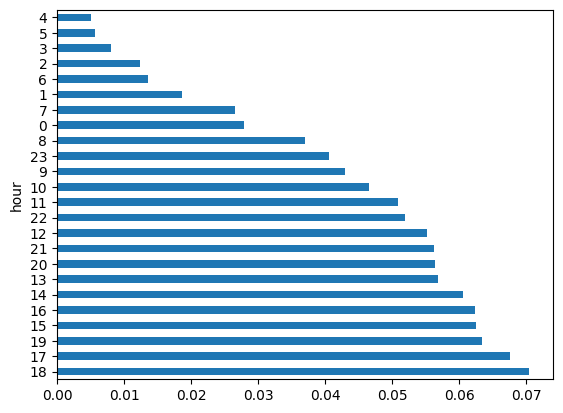

In [67]:
df.hour.value_counts(normalize=True).plot.barh()

In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)



<Axes: ylabel='day'>

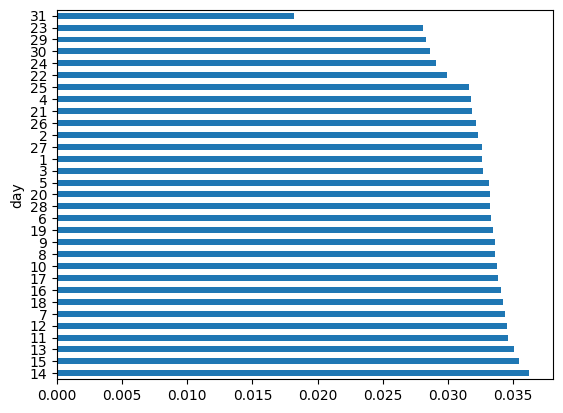

In [68]:
df.day.value_counts(normalize=True).plot.barh()

In [ ]:
# Show the monthly trends in pickups



<Axes: ylabel='month'>

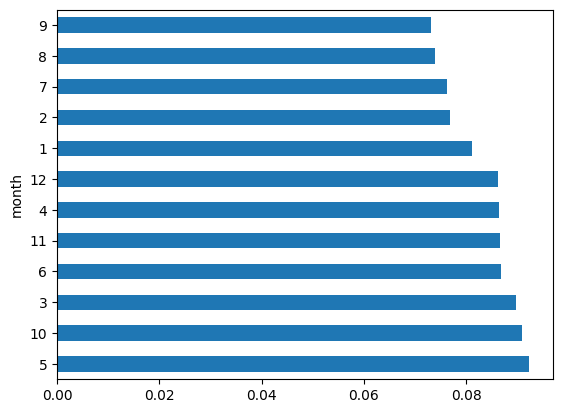

In [69]:
df.month.value_counts(normalize=True).plot.barh()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [ ]:
# Analyse the above parameters
Non -zero values have been already handeled earlier, so these parameters do not contain
negative values but might contain zero values


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [ ]:
# Create a df with non zero entries for the selected parameters.



In [70]:
inp0=df[(df[['fare_amount', 'tip_amount','total_amount','trip_distance']] != 0).all(axis=1)]
inp0

vendorid tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               1  2023-01-05 07:50:08   2023-01-05 08:02:04              2.0   
1               2  2023-01-17 07:47:24   2023-01-17 08:00:50              5.0   
2               2  2023-01-25 21:57:59   2023-01-25 22:00:33              1.0   
3               2  2023-01-09 19:36:54   2023-01-09 19:52:01              2.0   
4               1  2023-01-11 22:19:13   2023-01-11 22:32:37              1.0   
...           ...                  ...                   ...              ...   
1896422         2  2023-12-17 22:41:03   2023-12-17 22:45:47              1.0   
1896423         2  2023-12-07 20:46:00   2023-12-07 21:05:24              1.0   
1896424         2  2023-12-08 01:35:07   2023-12-08 01:37:40              2.0   
1896425         2  2023-12-11 12:24:37   2023-12-11 13:17:29              2.0   
1896426         2  2023-12-13 22:27:07   2023-12-13 22:37:09              1.0   

         trip_distance  ratecodeid  pulocationid  dolocationid  payment_type  \
0                 1.90         1.0           239           236             1   
1                 1.86         1.0           239           162             1   
2                 0.50         1.0           162           170             1   
3                 2.56         1.0           162           262             1   
4                 2.80         1.0           164           231             1   
...                ...         ...           ...           ...           ...   
1896422           0.98         1.0            75           262             1   
1896423           2.28         1.0           164           237             1   
1896424           0.75         1.0            68            68             1   
1896425          20.87         2.0           132           239             1   
1896426           3.05         1.0           236            42             1   

         fare_amount  ...  mta_tax  tip_amount  tolls_amount  \
0               13.5  ...      0.5        2.50          0.00   
1               14.2  ...      0.5        3.64          0.00   
2                5.1  ...      0.5        2.02          0.00   
3               17.0  ...      0.5        4.70          0.00   
4               14.9  ...      0.5        3.98          0.00   
...              ...  ...      ...         ...           ...   
1896422          7.2  ...      0.5        1.00          0.00   
1896423         17.7  ...      0.5        4.54          0.00   
1896424          5.8  ...      0.5        2.16          0.00   
1896425         70.0  ...      0.5       16.54          6.94   
1896426         14.9  ...      0.5        4.97          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  month  \
0                          1.0         20.00                   2.5      1   
1                          1.0         21.84                   2.5      1   
2                          1.0         12.12                   2.5      1   
3                          1.0         28.20                   2.5      1   
4                          1.0         23.88                   2.5      1   
...                        ...           ...                   ...    ...   
1896422                    1.0         13.20                   2.5     12   
1896423                    1.0         27.24                   2.5     12   
1896424                    1.0         12.96                   2.5     12   
1896425                    1.0         99.23                   2.5     12   
1896426                    1.0         24.87                   2.5     12   

         day  hour  airport_fee  
0          5     7         0.00  
1         17     7         0.00  
2         25    21         0.00  
3          9    19         0.00  
4         11    22         0.00  
...      ...   ...          ...  
1896422   17    22         0.00  
1896423    7    20         0.00  
1896424    8     1         0.00  
1896425   11    12         1.75  
1896426

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

In [ ]:
# Group data by month and analyse monthly revenue



In [71]:
inp0.groupby('month')['total_amount'].sum()

month
1     3234203.96
2     3088104.37
3     3696828.14
4     3588857.24
5     3939624.77
6     3695156.06
7     3117520.45
8     3018598.10
9     3185606.27
10    3982905.14
11    3747829.24
12    3633889.59
Name: total_amount, dtype: float64

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [ ]:
# Calculate proportion of each quarter


In [ ]:
quarter1 = df.groupby('col1')['col2'].sum()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

In [ ]:
# Show how trip fare is affected by distance



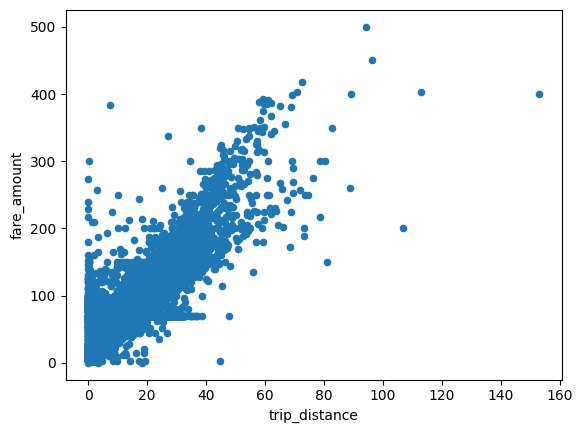

In [74]:
inp0.plot.scatter(x='trip_distance',y='fare_amount')
plt.show()    

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [ ]:
# Show relationship between fare and trip duration



In [ ]:
# Show relationship between fare and number of passengers



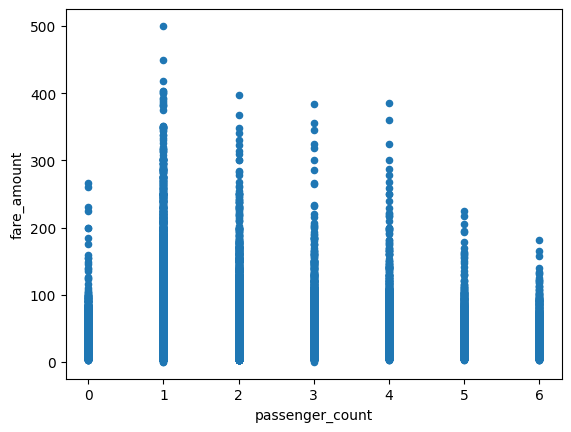

In [76]:
inp0.plot.scatter(x='passenger_count',y='fare_amount')
plt.show()

In [ ]:
# Show relationship between tip and trip distance



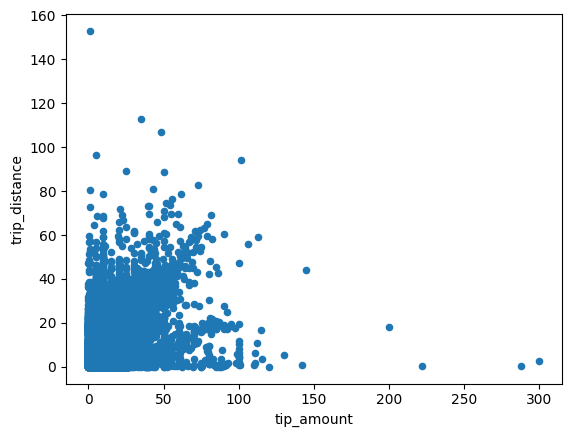

In [77]:
inp0.plot.scatter(x='tip_amount',y='trip_distance')
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [ ]:
# Analyse the distribution of different payment types (payment_type).




In [78]:
p1 = df['payment_type'].value_counts(normalize=True)
p1

payment_type
1    0.815606
2    0.171995
4    0.007498
3    0.004902
Name: proportion, dtype: float64

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
# !pip install geopandas

In [173]:
pip install geopandas


  Obtaining dependency information for geopandas from https://files.pythonhosted.org/packages/c4/64/7d344cfcef5efddf9cf32f59af7f855828e9d74b5f862eddf5bfd9f25323/geopandas-1.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for pyogrio>=0.7.2 from https://files.pythonhosted.org/packages/94/8d/24f21e6a93ca418231aee3bddade7a0766c89c523832f29e08a8860f83e6/pyogrio-0.10.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for pyproj>=3.3.0 from https://files.pythonhosted.org/packages/92/39/ef6f06a5b223dbea308cfcbb7a0f72e7b506aef1850e061b2c73b0818715/pyproj-3.7.1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for shapely>=2.0.0 from https://files.pythonhosted.org/packages/27/57/8ec7c62012bed06731f7ee979da7f207bbc4b27feed5f36680b6a70df54f/shapely-2.0.7-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/323.6 kB ? eta -:--:--
   ------------- -------------------------- 112.6/323.6 kB 3.3 MB/s eta 0:00:01
 

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
# import geopandas as gpd


# Read the shapefile using geopandas
zones = # read the .shp file using gpd
zones.head()

In [80]:
import geopandas as gpd

In [81]:
zones=gpd.read_file('C:/Users/dhana/Desktop/Niranjan Python/EDA/Datasets and Dictionary-NYC/Datasets and Dictionary/taxi_zones/taxi_zones.shp')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

In [ ]:
# print(zones.info())
# zones.plot()

In [82]:
zones.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB


<Axes: >

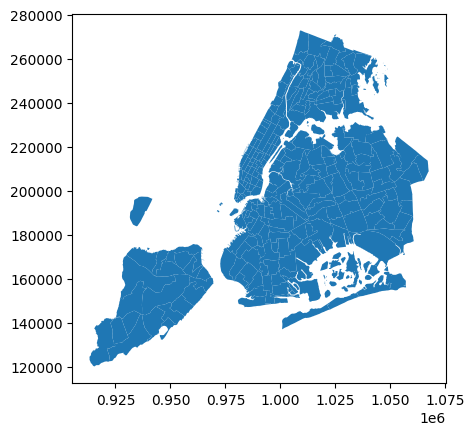

In [83]:
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [12]:
import pandas as pd

In [ ]:
# Merge zones and trip records using locationID and PULocationID



In [84]:
inp0

vendorid tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0               1  2023-01-05 07:50:08   2023-01-05 08:02:04              2.0   
1               2  2023-01-17 07:47:24   2023-01-17 08:00:50              5.0   
2               2  2023-01-25 21:57:59   2023-01-25 22:00:33              1.0   
3               2  2023-01-09 19:36:54   2023-01-09 19:52:01              2.0   
4               1  2023-01-11 22:19:13   2023-01-11 22:32:37              1.0   
...           ...                  ...                   ...              ...   
1896422         2  2023-12-17 22:41:03   2023-12-17 22:45:47              1.0   
1896423         2  2023-12-07 20:46:00   2023-12-07 21:05:24              1.0   
1896424         2  2023-12-08 01:35:07   2023-12-08 01:37:40              2.0   
1896425         2  2023-12-11 12:24:37   2023-12-11 13:17:29              2.0   
1896426         2  2023-12-13 22:27:07   2023-12-13 22:37:09              1.0   

         trip_distance  ratecodeid  pulocationid  dolocationid  payment_type  \
0                 1.90         1.0           239           236             1   
1                 1.86         1.0           239           162             1   
2                 0.50         1.0           162           170             1   
3                 2.56         1.0           162           262             1   
4                 2.80         1.0           164           231             1   
...                ...         ...           ...           ...           ...   
1896422           0.98         1.0            75           262             1   
1896423           2.28         1.0           164           237             1   
1896424           0.75         1.0            68            68             1   
1896425          20.87         2.0           132           239             1   
1896426           3.05         1.0           236            42             1   

         fare_amount  ...  mta_tax  tip_amount  tolls_amount  \
0               13.5  ...      0.5        2.50          0.00   
1               14.2  ...      0.5        3.64          0.00   
2                5.1  ...      0.5        2.02          0.00   
3               17.0  ...      0.5        4.70          0.00   
4               14.9  ...      0.5        3.98          0.00   
...              ...  ...      ...         ...           ...   
1896422          7.2  ...      0.5        1.00          0.00   
1896423         17.7  ...      0.5        4.54          0.00   
1896424          5.8  ...      0.5        2.16          0.00   
1896425         70.0  ...      0.5       16.54          6.94   
1896426         14.9  ...      0.5        4.97          0.00   

         improvement_surcharge  total_amount  congestion_surcharge  month  \
0                          1.0         20.00                   2.5      1   
1                          1.0         21.84                   2.5      1   
2                          1.0         12.12                   2.5      1   
3                          1.0         28.20                   2.5      1   
4                          1.0         23.88                   2.5      1   
...                        ...           ...                   ...    ...   
1896422                    1.0         13.20                   2.5     12   
1896423                    1.0         27.24                   2.5     12   
1896424                    1.0         12.96                   2.5     12   
1896425                    1.0         99.23                   2.5     12   
1896426                    1.0         24.87                   2.5     12   

         day  hour  airport_fee  
0          5     7         0.00  
1         17     7         0.00  
2         25    21         0.00  
3          9    19         0.00  
4         11    22         0.00  
...      ...   ...          ...  
1896422   17    22         0.00  
1896423    7    20         0.00  
1896424    8     1         0.00  
1896425   11    12         1.75  
1896426

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group data by location and calculate the number of trips



**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
# Merge trip counts back to the zones GeoDataFrame




The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [ ]:
# Define figure and axis


# Plot the map and display it



In [ ]:
# can you try displaying the zones DF sorted by the number of trips?



Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day



How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [ ]:
# Visualise the number of trips per hour and find the busiest hour



Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction =



**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [ ]:
# Compare traffic trends for the week days and weekends



What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# Find top 10 pickup and dropoff zones



**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios



**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones



Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)



##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts




**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [ ]:
# Compare the average fare per mile for different days and for different times of the day



**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [ ]:
# Compare fare per mile for different vendors



**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [ ]:
# See how passenger count varies across hours and days




**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones



In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.